# **PREDICTION OF A CLIENT TERM DEPOSIT ON BANK MARKETING DATA**


>*Christian Riccio P37000002*

>*Giacomo Matrone P37000011*


##Master Degree in Data Science, Università degli Studi di Napoli Federico II



> Statistical Analysis exam









# `Abstract:`
Statistical learning refers to a vast set of tools for **understendig data**. Such tools are the key protagonists in machine learning apllications. Infact, thanks to this tools alghorythms explores data and look for patterns among them for making predictions on a target variable. It comes natural, that, there will be some *input features* helping the alghoritms. 
In general suppose that we observe a response variable, say *y*, and a set of *p* different predictors, also called features, $x_{i}$, for $i=1...p$. We assume that there is some noisy relationship between *y* and the *p* predictors in the form of $y=f(X)+\epsilon$. 

So, the aim of our work is to find the best function that modelizes and represents the best functional link between the set of predictors and the y-response, with the goal of making correct predictions on a new, previously unseen, data. In this work we start with the presentation of the data, which shows us some insights. 

By the end, we propose a bunch of statistical methodologies which aim to make predictions on the basis of a classification approach. The final algorythm we chose is XGBoost, which is a very popular ML approach in modern competitions.


# Introduction

The following data set regards the phone-marketing campaigns conducted throught time by a  Portuguese banking institution. The source of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
From the repesitory, different csv-format datasets are avaiable. 
In our work we decide to use only one of those, called `'bank-additional-full.csv'`.

Phone marketing has different approaches, with some of them listed in the following video:

In [ ]:
#@title A first glimpse on Bank Marketing: The American way
from IPython.display  import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/YPt-GN_BiQE" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#Statistical Question
*Which are the factors that affect more the term deposit subscription, given a marketing campaign? Which prescription has to be followed to sell more?*

To answer these and other questions, we study the data found by proceeding in the following analysis.

In [ ]:
#@title Downloading data
!mkdir banking_additional
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip && unzip bank-additional.zip -d ./banking_additional

mkdir: cannot create directory ‘banking_additional’: File exists
--2020-04-30 11:53:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K   655KB/s    in 0.7s    

2020-04-30 11:53:45 (655 KB/s) - ‘bank-additional.zip.1’ saved [444572/444572]

Archive:  bank-additional.zip
replace ./banking_additional/bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./banking_additional/bank-additional/.DS_Store  
  inflating: ./banking_additional/__MACOSX/bank-additional/._.DS_Store  
  inflating: ./banking_additional/bank-additional/.Rhistory  
  inflating: ./banking_additional/bank-additional/b

We start by importing the main python modules, wich will help us in doing all the work.
In particular `pandas` is a library to perform dataframes' scientific computations and plotting. The module is built upon `numpy` library that enables python in performing linear algebra calculus and scientific computing.
Going ahead, `matplotlib` and `seaborn` represent two of the most useful, easy to use plotting libraries.
As the last, but not the least, `sklearn` and `scipy` libraries are commonly used in implementing cutting edge machine learning models (the former) and statistical learning frameworks (the latter).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import log_loss
from scipy.stats import norm


In [ ]:
!pip install scikit-plot
import scikitplot as skplt

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from imblearn.over_sampling import SMOTE

## Data Loading

To begin our analysis, we proceed in loading data, as follows:

In [ ]:
data_ext_full = pd.read_csv("./banking_additional/bank-additional/bank-additional-full.csv",sep=';')

The data has `;` separator, which is different from the commonly used, in csv format, comma `,`.

## Data exploration

We, first of all, proceed in exploring data as follows:

* Study the data head, in order to view the columns and to understand the underlying data;
* We print the data shape, in order to know how many observations and columns there are;
* Then, we print out the generic info about our dataset. This allows us studying the features' data types, missing values and generic composition of our dataset;
* We also describe the non categorical variables, in order to have a first insight about numeric variables properties;
* Finally, we proceed in visualizing univariate and multivariate properties.

In [ ]:
#@title Data head
data_ext_full.head()

age        job  marital  ... euribor3m nr.employed   y
0   56  housemaid  married  ...     4.857      5191.0  no
1   57   services  married  ...     4.857      5191.0  no
2   37   services  married  ...     4.857      5191.0  no
3   40     admin.  married  ...     4.857      5191.0  no
4   56   services  married  ...     4.857      5191.0  no

[5 rows x 21 columns]

### First insight

Data is made up of different columns. The first element that catches our eye is the `cons.conf.idx` column, which seems a bit odd. From a research we made, it cannot be negative, since it typically varyies between 0 and 200, indicating an increased optimism torwards the economical environment ( [here](https://www.csbs.org/cbindex) there are more info about the index.).<br>

What we do, in order to reach the coherence with the standard index, is to multiply the whole column by $-1$. 


In [ ]:
data_ext_full['cons.conf.idx'] = data_ext_full['cons.conf.idx']*-1

As it is possible to notice, `cons.conf.idx` is now consistent to the typical values range.

In [ ]:
data_ext_full['cons.conf.idx'].head()

0    36.4
1    36.4
2    36.4
3    36.4
4    36.4
Name: cons.conf.idx, dtype: float64

The variables' description is the following:

Input variables, which can be grouped as it follows:
#### Bank client data:
* age (numeric);
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown');
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed);
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown');
* default: has credit in default? (categorical: 'no','yes','unknown');
* housing: has housing loan? (categorical: 'no','yes','unknown');
* loan: has personal loan? (categorical: 'no','yes','unknown');

#### Related with the last contact of the current campaign:

* contact: contact communication type (categorical: 'cellular','telephone');
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec');
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri');
* duration: last contact duration, in seconds (numeric);

#### Other attributes:

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact);
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted);
* previous: number of contacts performed before this campaign and for this client (numeric);
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success');

#### Social and economic context attributes

* emp.var.rate: employment variation rate - quarterly indicator (numeric);
* cons.price.idx: consumer price index - monthly indicator (numeric);
* cons.conf.idx: consumer confidence index - monthly indicator (numeric);
* euribor3m: euribor 3 month rate - daily indicator (numeric);
* nr.employed: number of employees - quarterly indicator (numeric);

#### Output variable (desired target):

* y - has the client subscribed a term deposit? (binary: 'yes','no').

### Data shape

We, then, check the data shape, in order to discuss about dimensionality of the same:

In [ ]:
print(data_ext_full.shape)

(41188, 21)


As it can be seen by the tuple, data is made of 41188 observations and has 21 features.

### Data info

In order to get a grasp of the type of variables we face, we print the pandas `.info()` method, which lists:

* Missing values, if any;
* Variable type (object for strings and int or float for numbers)

In [ ]:
#@title
data_ext_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

As said above, with the pandas data.info method we can understand and focus on the type of the variables we are facing. Most of the 21 variables are type object, which mean that those variables are categorical and have to be encoded in some way, as seen after.

### Numeric data description

Numeric data description group the principal statistical indexes, such as count, mean, std, median, quantiles, min and max.<br><br> Numeric columns are:

* age 	
* duration 	
* campaign 	
* pdays 	
* previous 	
* emp.var.rate 	
* cons.price.idx 	
* cons.conf.idx 	
* euribor3m 	
* nr.employed


In [ ]:
#@title 
data_ext_full.describe()

age      duration  ...     euribor3m   nr.employed
count  41188.00000  41188.000000  ...  41188.000000  41188.000000
mean      40.02406    258.285010  ...      3.621291   5167.035911
std       10.42125    259.279249  ...      1.734447     72.251528
min       17.00000      0.000000  ...      0.634000   4963.600000
25%       32.00000    102.000000  ...      1.344000   5099.100000
50%       38.00000    180.000000  ...      4.857000   5191.000000
75%       47.00000    319.000000  ...      4.961000   5228.100000
max       98.00000   4918.000000  ...      5.045000   5228.100000

[8 rows x 10 columns]

From the table, it is possible to observe that the mean `age` of people interviewed from the bank is approximatively 40 years old, with the median falling just a bit behind. Age variability suggests that only in a few cases we have a call to a person with more than 60 years. 

`cons.conf.idx` (consumers' confidence index) shows only values below 100, implying that the target of the campaign is a person with a pessimistic outlook about future developments of economy.

The variable `pdays` shows a staggering 999 in mean, with all other percentiles falling in the same value.<br> The **standard deviation** is of 186.91, implying there might be other minority values to be discovered. Pdays tells us the number of days a person was previously contacted. Obviously, 999 is a synthetic value. As we read the documentation of the dataset, we discover that pdays equals 999 only if a person was never contacted before. During our analysis, we will mask pdays with a -1 if it equals 999, in order to better evaluate the other variables as well.

A particular focus was taken on duration variable, which shows a standard deviation of the same magnitude of the mean. This means that the duration of the phone call can vary a lot based on different factors. 


### Class counts

Our problem is a classification one. In order to proceed, we study eventual class imbalance as it follows (**hint**: *classes are imbalanced*)

Term deposit subscription proportion (class imbalance)

In [ ]:
data_ext_full.y.value_counts()/data_ext_full.shape[0]

no     0.887346
yes    0.112654
Name: y, dtype: float64

In presence of an imbalanced response class, it is extremely probable, in general, that the learning process is distorted, because the model tends to focus on the prevailing class and ignore rare events (i.e. $y=yes$). Class imbalance can be addressed as it follows:
* With the right metrics (precision, recall, F1Score);
* By creating synthetic samples with oversampling techniques (SMOTE);
* By stratifying train and test split.

In [ ]:
#@title Exploration of pdays-variable
data_ext_full.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

As it is possible to notice, pdays has a staggering 999 in it. For computational efficency, we replace 999 with a less-cumbersome -1, which will, however, helps in identifying clients not previously contacted

In [ ]:
data_ext_full.pdays = data_ext_full.pdays.replace({999:-1})

In [ ]:
data_ext_full.head()

age        job  marital  ... euribor3m nr.employed   y
0   56  housemaid  married  ...     4.857      5191.0  no
1   57   services  married  ...     4.857      5191.0  no
2   37   services  married  ...     4.857      5191.0  no
3   40     admin.  married  ...     4.857      5191.0  no
4   56   services  married  ...     4.857      5191.0  no

[5 rows x 21 columns]

#Exploratory Analysis #1
In order to analyze and understand the behaviour of each variable with respect to the target variable y and also how each predictor is linked to the other, we use pairplot from seaborn module.

The pairwise relationship has been divided for the yes and no group and overplotted with different colours. On the diagonal axis of the chart there is the univariate density plot of each numeric variable of the data frame (overplotted), while on the non diagonal elements there are the pairwise scatterplots. We can figure that there are variables (like age) that show similar distribution wrt the response (yes or no), while there are other variables, like duration, that clearly show a different distribution wether the contacted person refuses to open a term deposit or not. Moreover, the probability of having a successful call, seems to be affected by other elements, as well, like the number of previous calls received, euribor rate at 3 months, etc.

The scatterplot contained in the two triangles of the matrix seem to suggest that the clusters of responses cannot be separated easily.

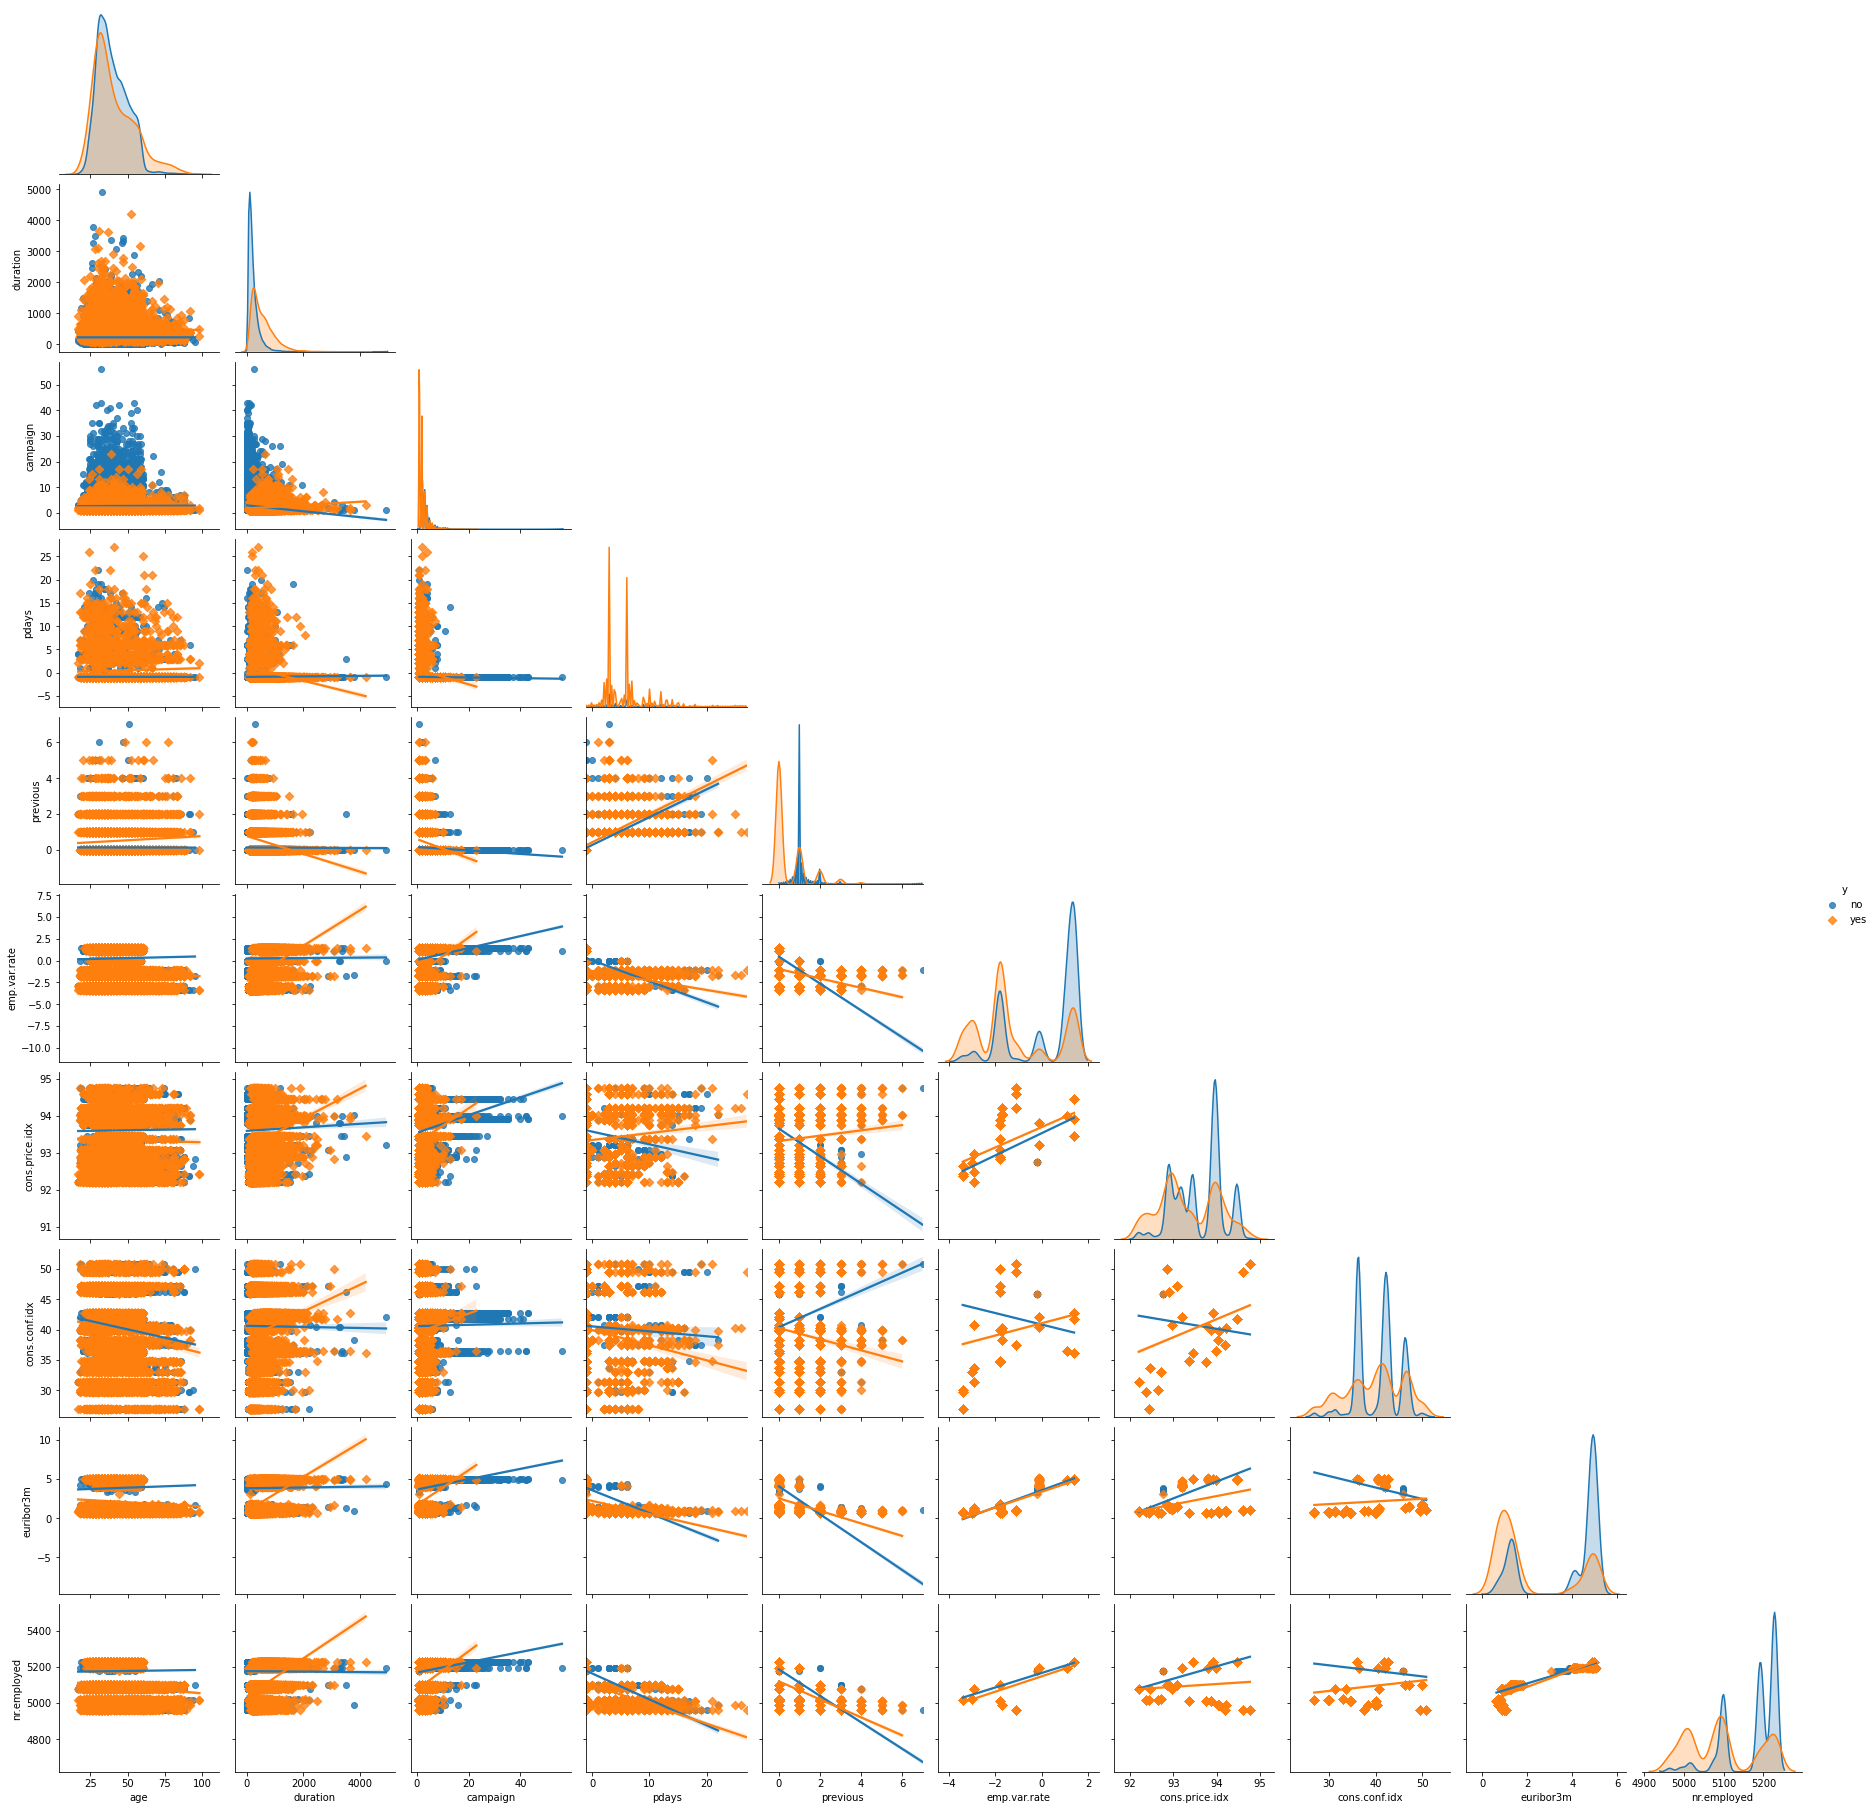

In [ ]:
sns.pairplot(data_ext_full.loc[:,["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]],diag_kind='kde',kind='reg',hue='y',corner=True,markers=['o','D']) # add jittering, transparency and range values

The above plot suggests that numeric variables alone behave very differently wether it is a `yes` or a `no` answer.

In order to illustrate further variables' composition, we proceed in building the following barplot, which shows that many consumers who decided to open a term deposit were never contacted before.
Hypotesis could be found in the fact that probably the phone marketing campaign was never conducted before, because it seems there is a vastly lower number of people that has been contacted than those that weren't. This opens the door to a potential bias in our data, as well.

An approach to solve this heavy imbalance is to subset the variables on $pvalue=-1$. However such a strategy has the potential drawback to decimate other positive responses as well, increasing the class imbalance in the response variable.

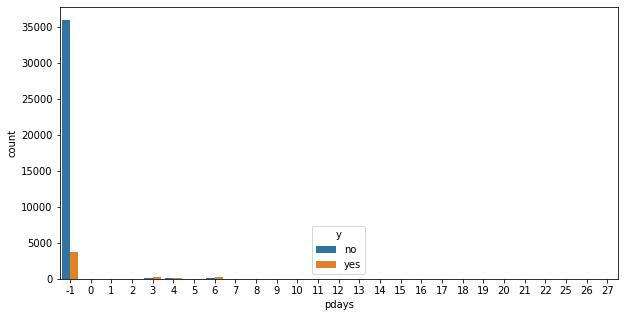

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='pdays',hue='y',data=data_ext_full)
plt.show()


In [ ]:
#@title Classes in pdays = -1
data_ext_full.loc[data_ext_full.pdays==-1,'y'].value_counts()/data_ext_full.loc[data_ext_full.pdays==-1,'y'].shape[0]

no     0.907418
yes    0.092582
Name: y, dtype: float64

As seen above, cutting out the proportion of people that were called more than once increments the target imbalance.

In [ ]:
#@title
cols = ['duration','emp.var.rate','cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

#Exploratory Analysis #2
In order to coduct an exploratory analysis on the numeric variable, we used violin plot charts provided by the seaborn module.
Violin plots can be considered a combination of the box-plot with a kernel density plot (`Kde` is a non parametric way to estimate the probability density function of a random variable). In the violin plot we can find informations such as:

*   median (the white small dot);
*   interquartile range (the black bar);
*   the lines adjacent the black bar which represent the classic whiskers of the box-plot.

As general consideration, it appears evident we are facing mostly asymmetric and multimodal variables, as it is possible to see in next plots:

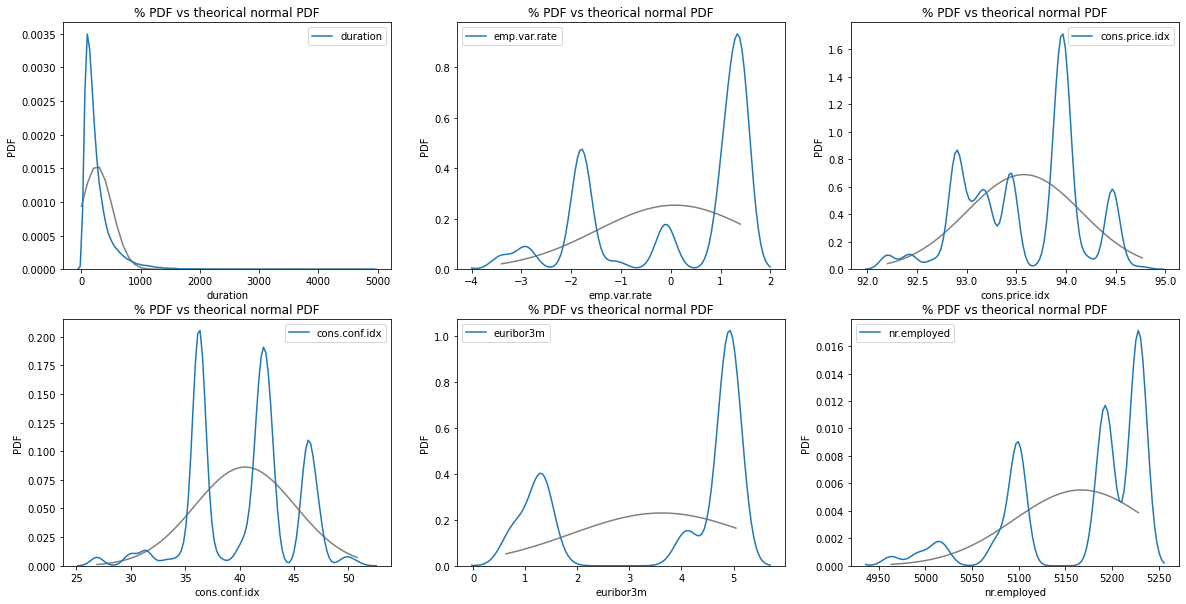

In [ ]:
#@title Numeric variables check - Tell with a picture (hint - duration is lognormal)
fig, axs = plt.subplots(2,3,figsize = (20,10))
for i in range(3):
    for j in range(2):
        curr_col = np.array(cols).reshape(2,3)[j,i]
        mean = data_ext_full[curr_col].mean()
        std = data_ext_full[curr_col].std()
        min_ = data_ext_full[curr_col].min()
        max_ = data_ext_full[curr_col].max()
        dist = norm(mean, std)
        xs = np.linspace(min_, max_)
        ys = dist.pdf(xs)

        # Plot the model PDF
        axs[j,i].plot(xs, ys, color='gray')

        # Plot the data KDE
        sns.kdeplot(data_ext_full[curr_col],ax=axs[j,i])

        # Label the axes
        axs[j,i].set_title("% PDF vs theorical normal PDF")
        axs[j,i].set_xlabel(curr_col)
        axs[j,i].set_ylabel('PDF')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


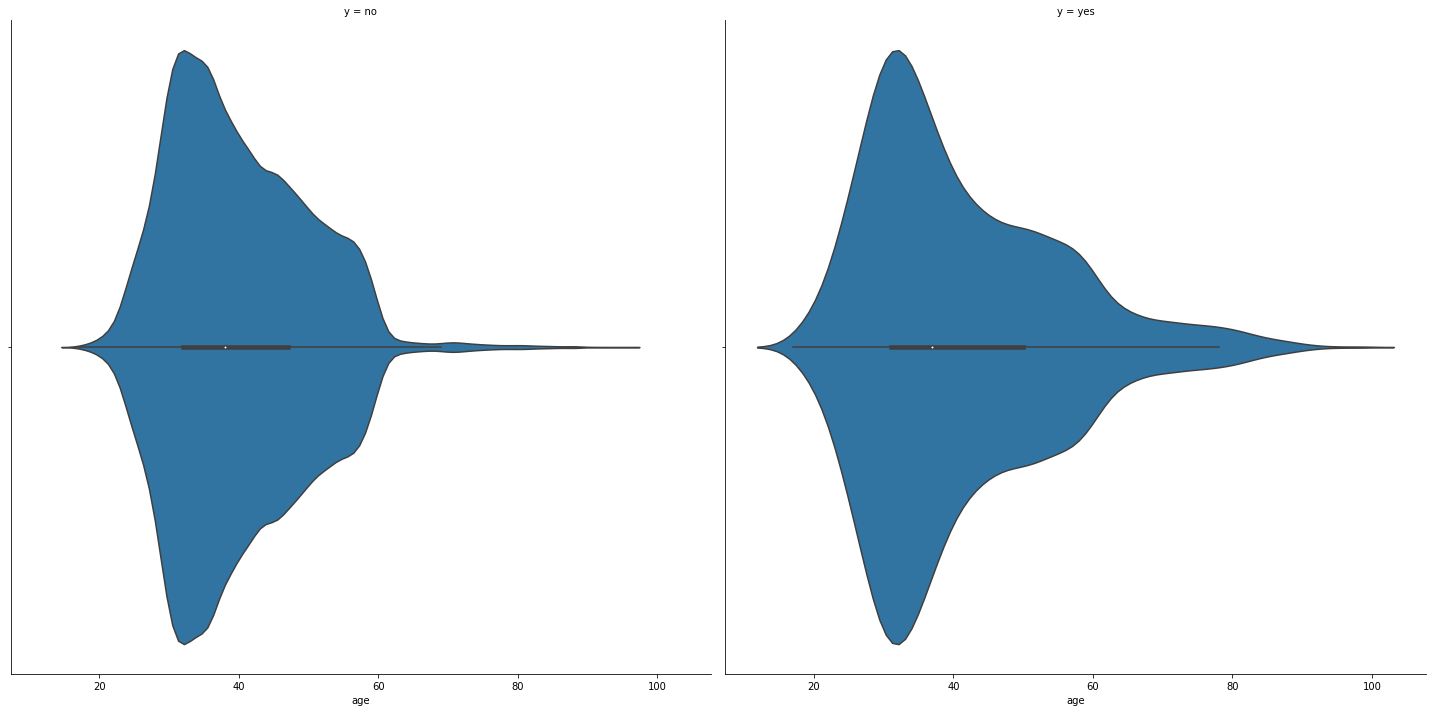

In [ ]:
#@title Age variable distribution within response
g = sns.FacetGrid(data_ext_full,col='y',size=10)
g.map(sns.violinplot,'age')

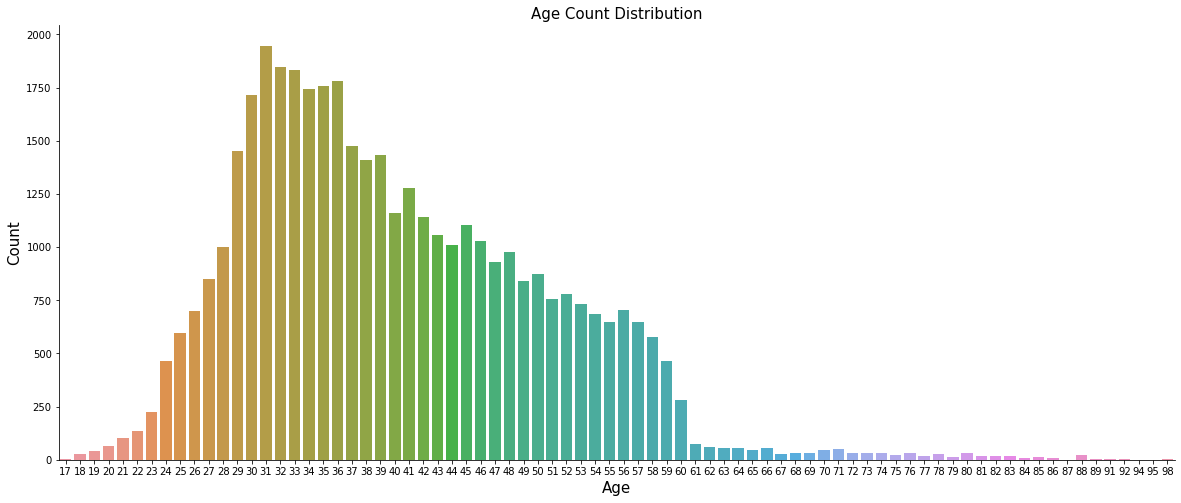

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = data_ext_full)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

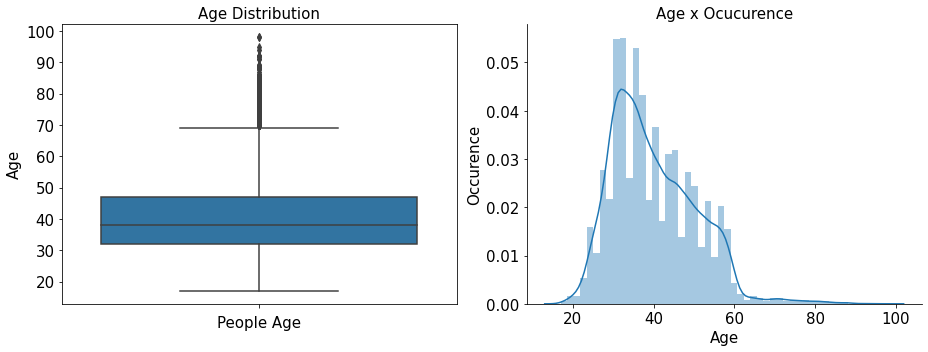

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data_ext_full, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data_ext_full['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

From our analysis, age variable is unimodal with long right tail and different outliers. The number of people interviewed with more than 70 years appears to be very rare.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


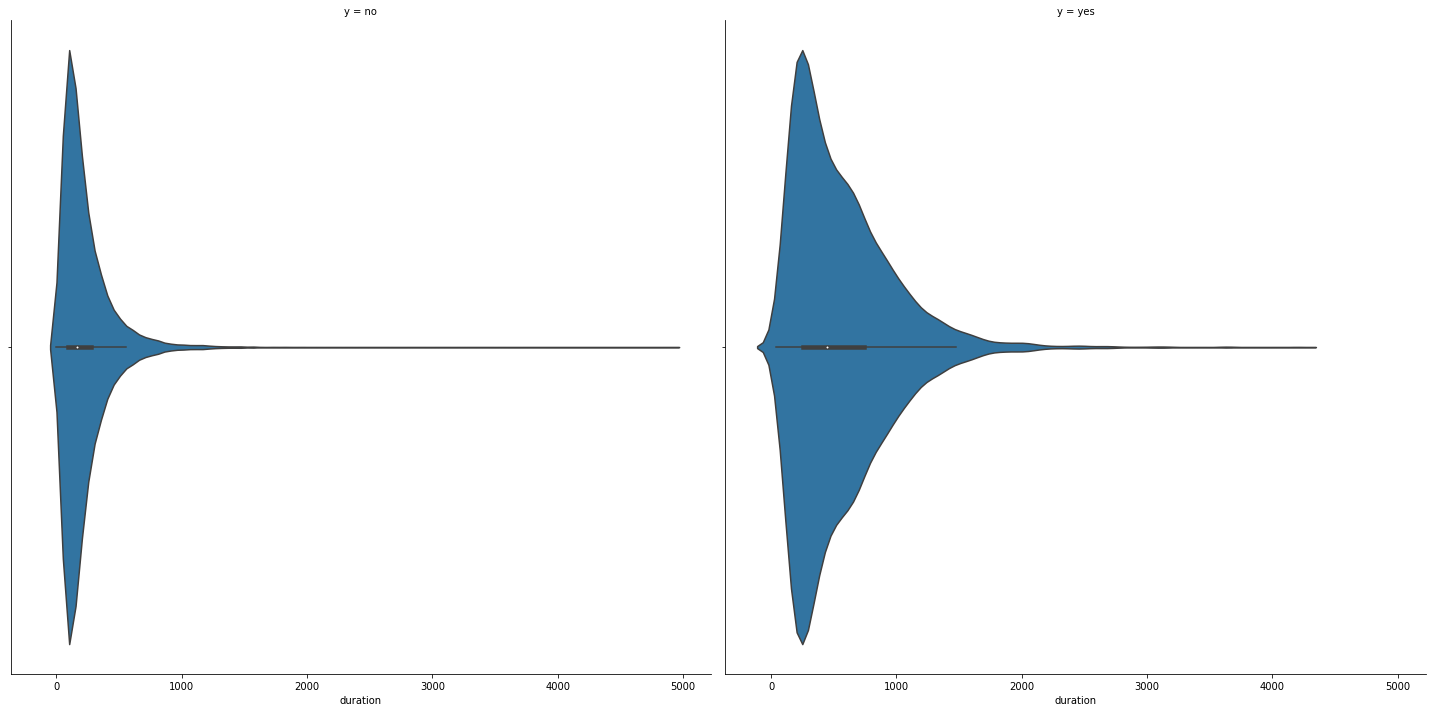

In [ ]:
#@title Duration variable distribution within response
g = sns.FacetGrid(data_ext_full,col='y',size=10)
g.map(sns.violinplot,cols[0])

From the above plots we can observe that the variable distribution for the two response of the y are different. Both seems to be log-normal distributions while mean and median are not coincident. The form of the distribution sudggest that in most of the cases a phone call duration has been pretty small, meaning that people were non interested in opening a deposit term. Different is the situation on the right side, long calls mean opening a deposit term.

In order to see that duration is log-normal, we proceed to plot the following transformation:

$$duration = log(duration + 1)$$

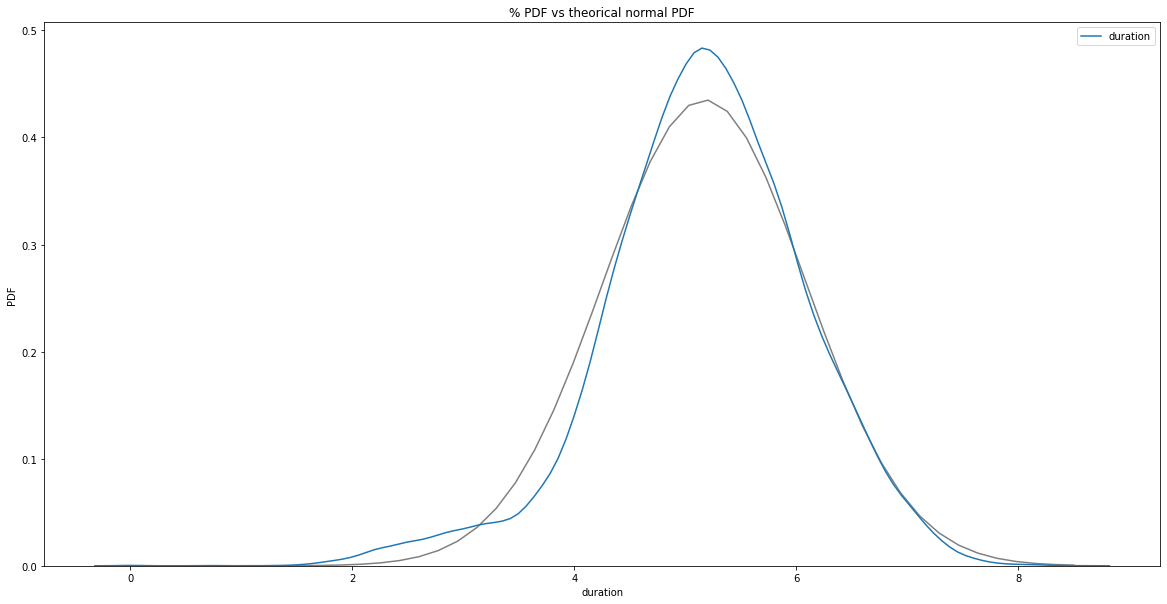

In [ ]:
#@title Log-duration normality
plt.figure(figsize=(20,10))
curr_col = 'duration'
mean = np.log(data_ext_full[curr_col]+1).mean()
std = np.log(data_ext_full[curr_col]+1).std()
min_ = np.log(data_ext_full[curr_col]+1).min()
max_ = np.log(data_ext_full[curr_col]+1).max()
dist = norm(mean, std)
xs = np.linspace(min_, max_)
ys = dist.pdf(xs)

# Plot the model PDF
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(np.log(data_ext_full[curr_col]+1))

# Label the axes
plt.title("% PDF vs theorical normal PDF")
plt.xlabel(curr_col)
plt.ylabel('PDF')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


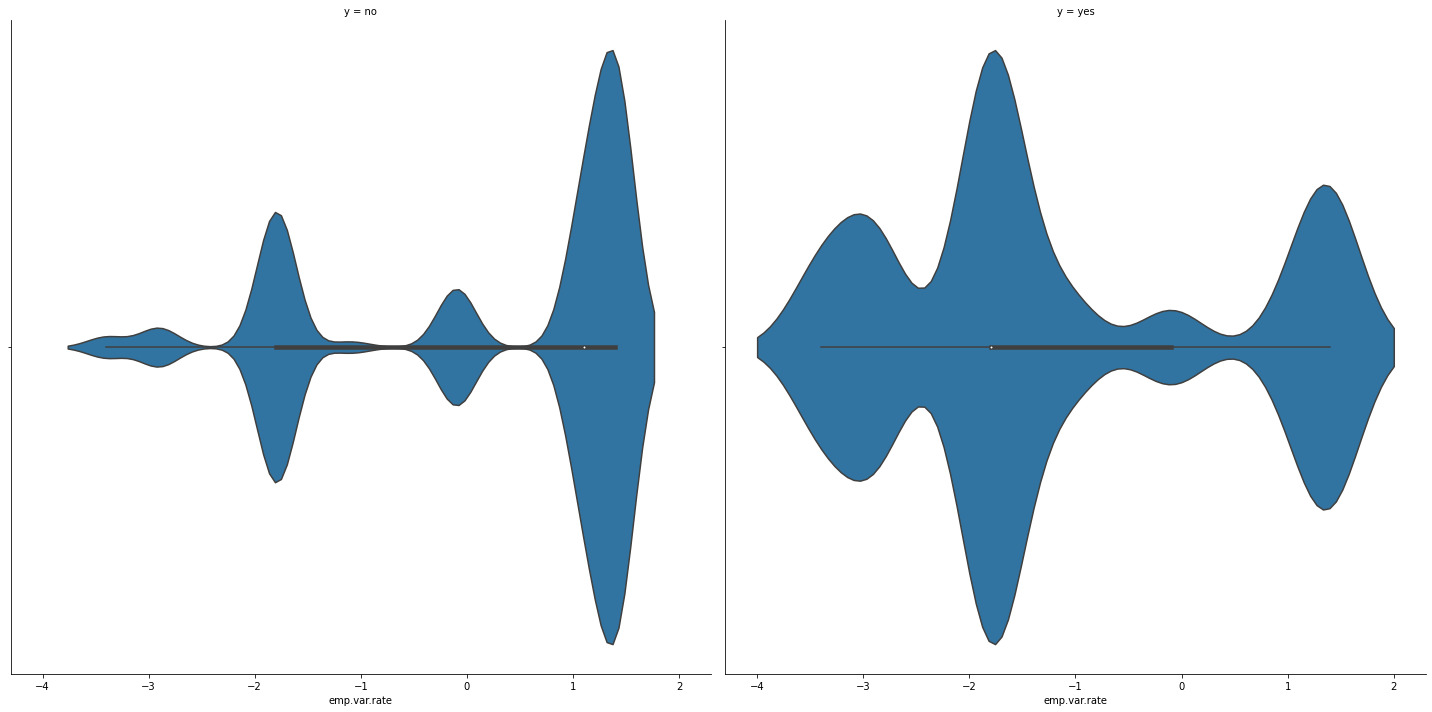

In [ ]:
#@title Emp.var.rate variable distribution within response
g = sns.FacetGrid(data_ext_full,col='y',size=10)
g.map(sns.violinplot,cols[1])

Here the situation is very different from the previous one. In fact, 'emp.var.rate' is multimodal, and shows a different behaviour for both y=no and y=yes. Recall that emp.var.rate stands for " employment variation rate ", which represents "the cylical employment variation". 

It is essentially the variation of how many people are being hired or fired due to the economic structural shocks or ciclicity.

Tipically, when the economy is in recession or depression, people want to be more conservative with their money because their financial future is less clear due to that particular point in the cycle. When the economy is at its peak, individuals can be more open to risky investments because their primary stability is wider, opening space to diversification. Therefore, the multimodality of the variable is completely explainable by forementioned phenomena.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


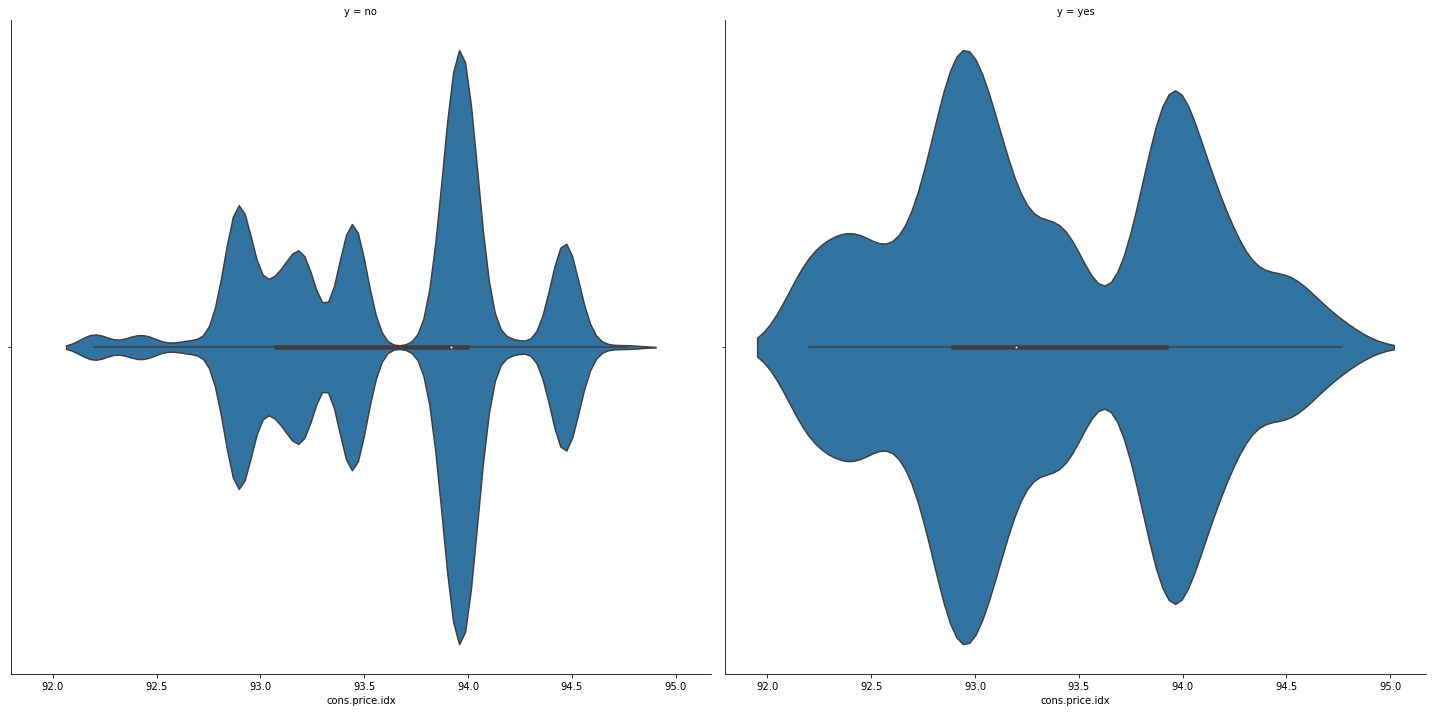

In [ ]:
#@title Consumer price index variable distribution within response
g = sns.FacetGrid(data_ext_full,col='y',size=10)
g.map(sns.violinplot,cols[2])

Recalling that "cons.price.idx" represents the consumer price index, we can explain the multimodal behaviour of such variable. Keep in mind that Consumer Price Index (CPI) is a measure that examines the weighted average price of a basket of consumer goods and services, such as transportation, food, and medical care. 

Changes in the CPI are used to assess price changes associated with the cost of living. The CPI is one of the most frequently used statistics for identifying periods of inflation or deflation.

Evidence seems to suggest that as CPI decreases, there is more money to invest, since the opportunity cost of still capital is really high. Therefore, people tend to invest more in this scenario, in order to diversificate risks.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


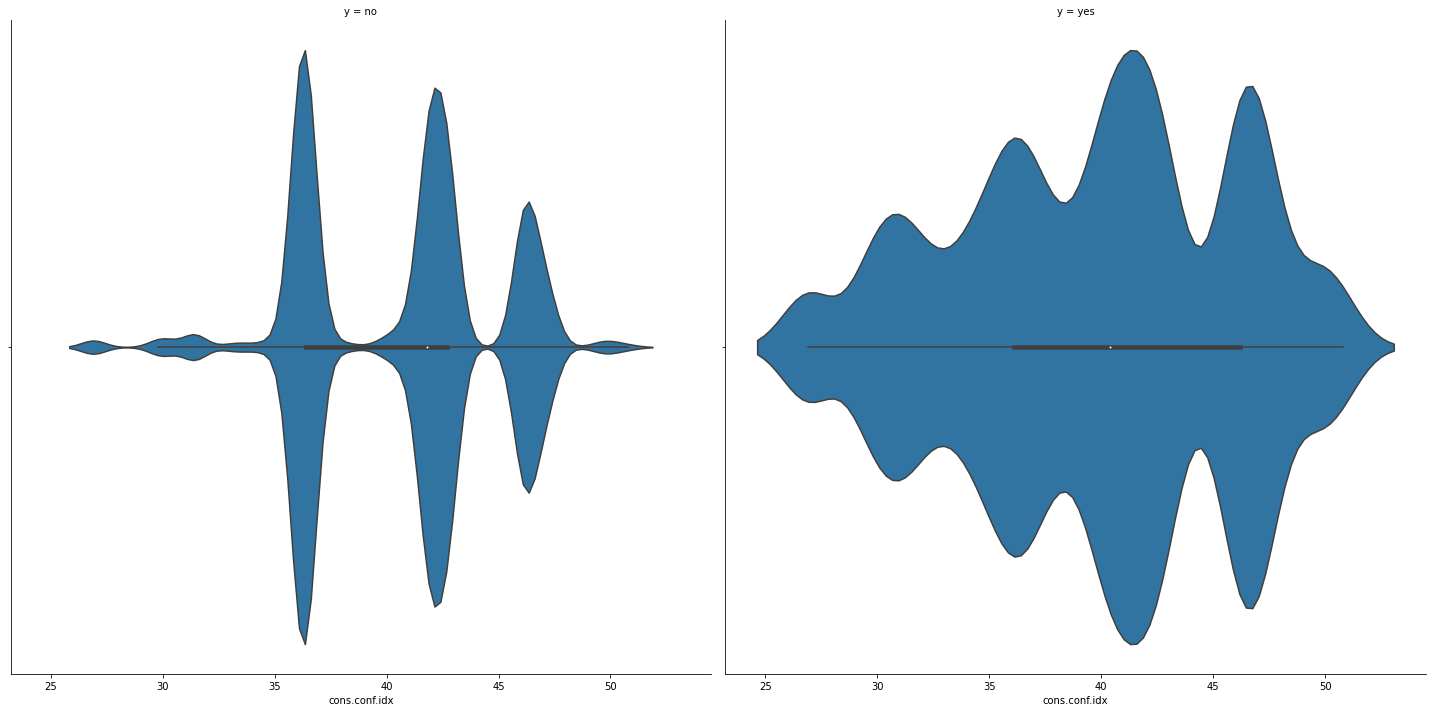

In [ ]:
#@title Consumer confidence index variable distribution within response
g = sns.FacetGrid(data_ext_full,col='y',size=10)
g.map(sns.violinplot,cols[3])

Here we have the "cons.conf.idx" that represent consumer confidence index.

Evidence show that consumers tend to be more equally distributed with y='yes' than with y='no'. This might suggest that the consumer confidence index is a weak predictor on wether a consumer chooses to open a term deposit or not.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


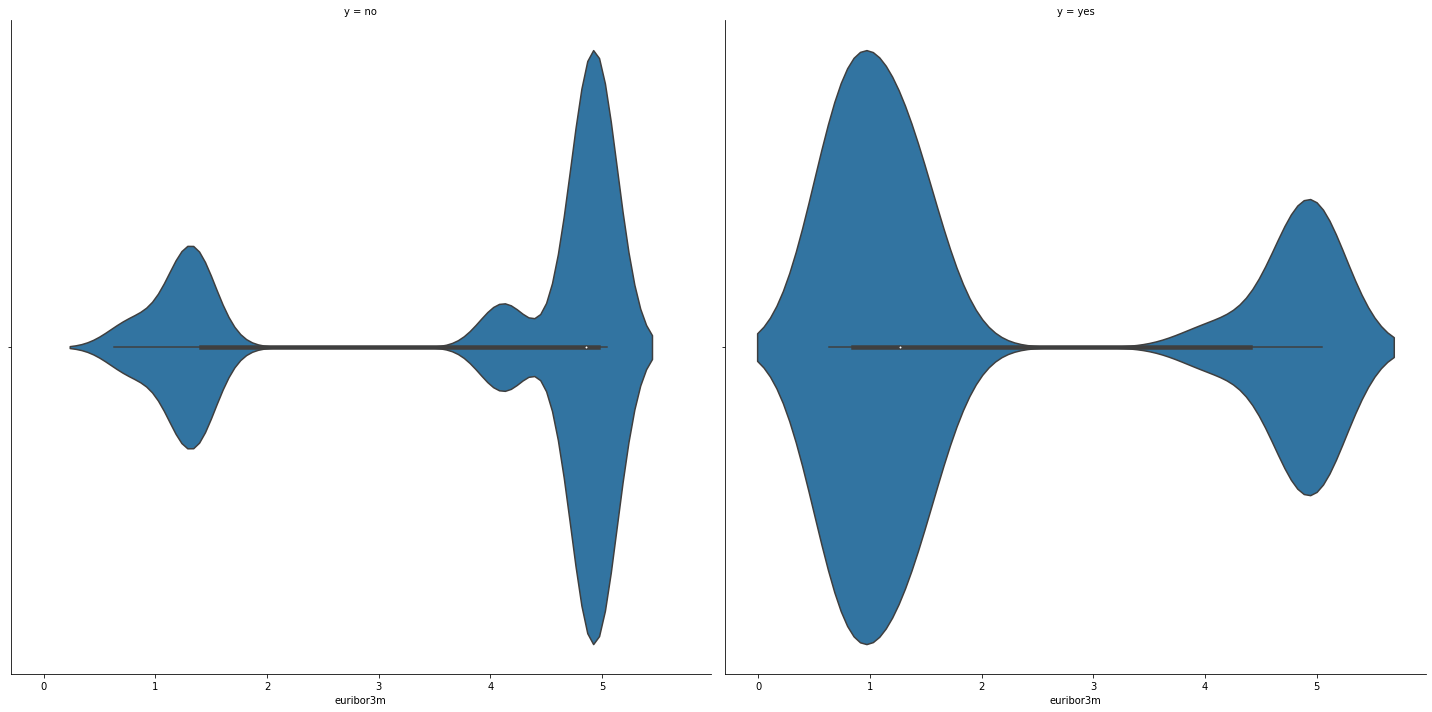

In [ ]:
g = sns.FacetGrid(data_ext_full,col='y',size=10)
g.map(sns.violinplot,cols[4])

Here we are referring to 'euribor3m' variable that represent euribor 3 month rate. Such parameter represent the average interest rate at which a large number of European banking institutions carry out interbank money exchange operations in the Euro area.
As it is possible to see (left) when such rate is high no long term deposit has been done, the opposite situation is shown on the right where we have a very high number of successfully deposit when such rate is lower. Again, this is another weak predictor.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


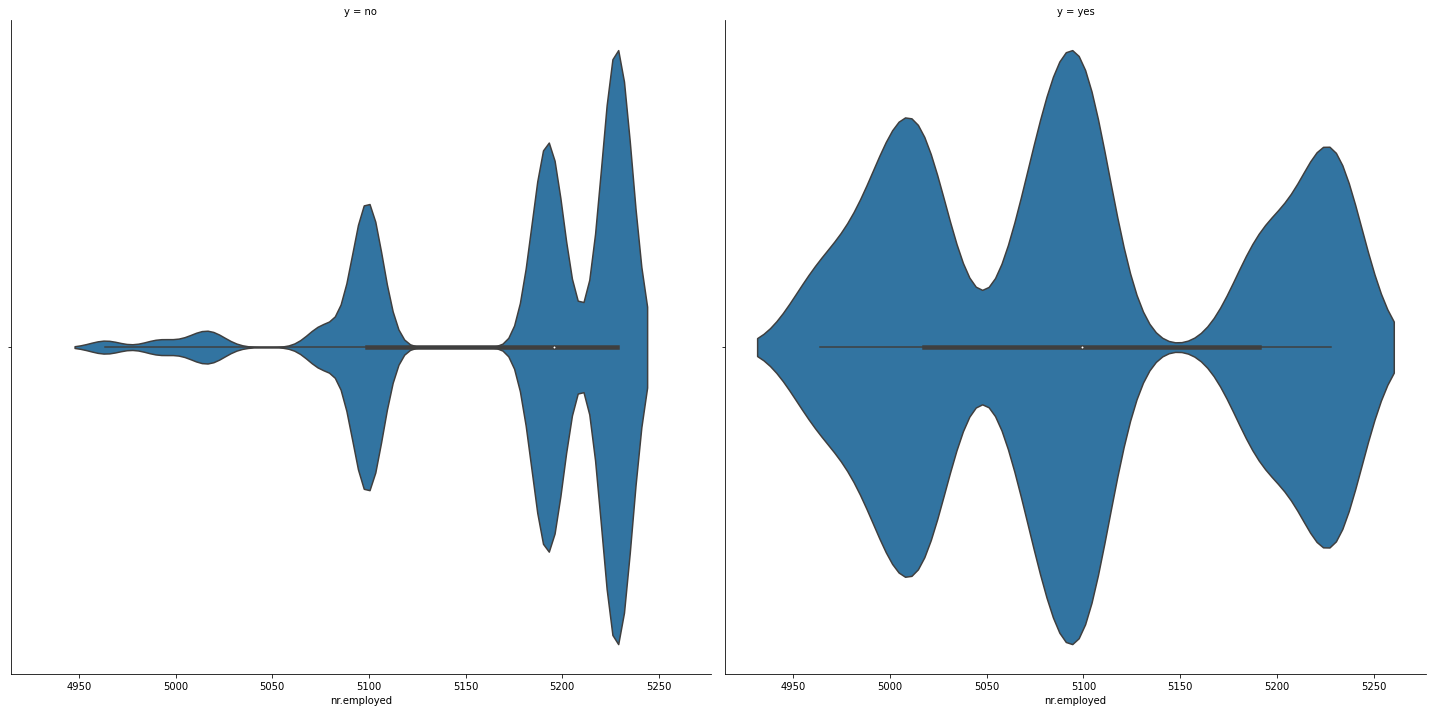

In [ ]:
g = sns.FacetGrid(data_ext_full,col='y',size=10)
g.map(sns.violinplot,cols[5])

In the above plots is displayed the number of emplyees of the bank is widely variable.

#Exploratory Analysis \#3


We now explore the composition of education feature as well and how it seems to affect the choice on wether or not subscribing the deposit.




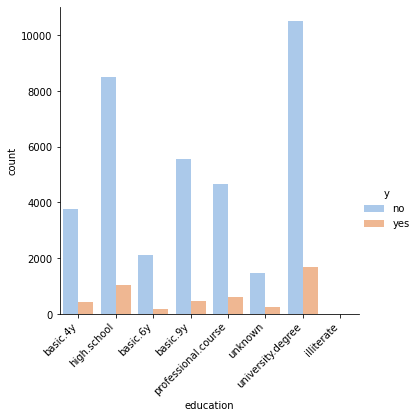

In [ ]:
sns.catplot(x="education", kind="count", palette="pastel", data=data_ext_full,hue='y')
plt.xticks(rotation=45,ha='right')
plt.show()

For the target variable represented by y=yes we can see that people with a high education level seems being more suceptible to accept a deposit term. Of course we keep in mind that there is imbalancement also in this variable, therefore, we conduct the following chi-square test: 

In [ ]:
#@title chi_sq function
def chi_sq(data2=None,tgt_col = None,crosstab = None,proba=0.95):
    """
    This function allows for testing different variables of a dataframe.\n
    Arguments are:\n
    :param data2: a pandas.Core.Dataframe class object containing a standard dataframe with categorical variables\n
    :param tgt_col: the target column towards which creating a contingency table\n
    :param crosstab: a possible crosstab. In this case data2 and tgt_col has to be None\n
    :param proba: confidence interval
    """


    try:
     
        if crosstab is None:
     
            col_of_int = [el for el in data2.select_dtypes('object').columns if el != tgt_col]
            pworkflow = []
            for el in col_of_int:
                table = pd.crosstab(data2.education,data2[el])
                stat, p, dof, expected = chi2_contingency(table)
             
                # interpret test-statistic
                prob = proba
                critical = chi2.ppf(prob, dof)
                
                if abs(stat) >= critical:
                    decision = "(reject H0)"
                    
                else:
                    decision = "(fail to reject H0)"
                   
                # interpret p-value
                alpha = 1.0 - prob

                if p <= alpha:
                    decision_proba = "(reject H0)"
                   
                else:
                    decision_proba = "(fail to reject H0)"

                pworkflow.append({
                    'var1':tgt_col,
                    'var2':el,
                    'stat':stat,
                    'degrees_of_freedom':dof,
                    'p-value':p,
                    'alpha':alpha,
                    'prob':proba,
                    'critical':critical,
                    "decision":decision,
                    "decision_proba":decision_proba
                    })
    
        else:
            pworkflow = []
            table = crosstab
            stat, p, dof, expected = chi2_contingency(table)
             
            # interpret test-statistic
            prob = proba
            critical = chi2.ppf(prob, dof)
            
            if abs(stat) >= critical:
                decision = "(reject H0)"
                
            else:
                decision = "(fail to reject H0)"
                
            # interpret p-value
            alpha = 1.0 - prob

            if p <= alpha:
                decision_proba = "(reject H0)"
                
            else:
                decision_proba = "(fail to reject H0)"

            pworkflow.append({
                'stat':stat,
                'degrees_of_freedom':dof,
                'p-value':p,
                'alpha':alpha,
                'prob':proba,
                'critical':critical,
                "decision":decision,
                "decision_proba":decision_proba
                })

    except:
        raise ValueError("check wether crosstab or data2 or tgt_col is None")
    
    return pd.DataFrame(pworkflow)


In [ ]:
crosstab = pd.crosstab(data_ext_full['education'],data_ext_full['y'])

display(crosstab)
print()
display(chi_sq(crosstab=crosstab))

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251

stat  degrees_of_freedom  ...     decision  decision_proba
0  193.105905                   7  ...  (reject H0)     (reject H0)

[1 rows x 8 columns]

Which tells us that variables seem to attract eachother. However, being the classes heavily imbalanced, this kind of comparison is only good in order to receive a suggestion. 

---
Finally, we explore more in depth the correlation among two variables.
Here we chose to use seaborn jointplot, that provides us the possibility to obtain very detailed plots in a plane, for marking a better visual interpretability of how two varibles behave jointly.

Most of the people that occur into the data set have an average age in the range of $[30,40]$ years and for such people the average duration of the call has been very short (the black spot).

Moreover, we make a panoramic on categorical variables as well:

### Jobs

People called were, in majority, admins or blue collars.

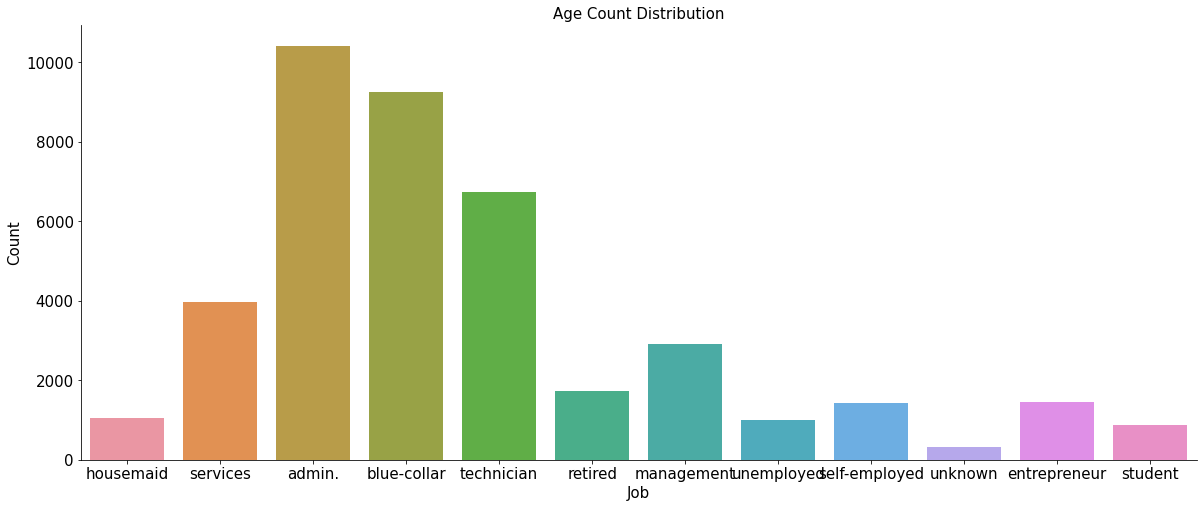

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = data_ext_full)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Marital status:

Vast majority of the interviewed were married.

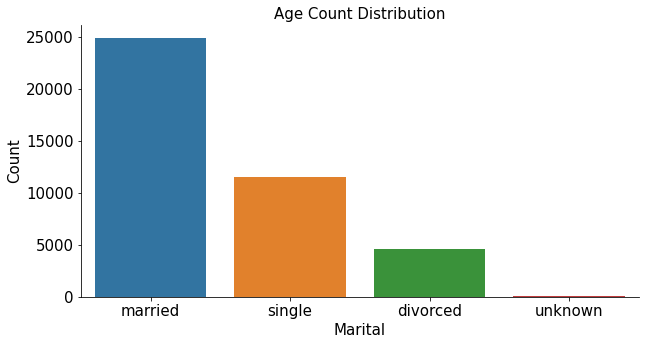

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = data_ext_full)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

With the following graph, we try to analize: 

What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation

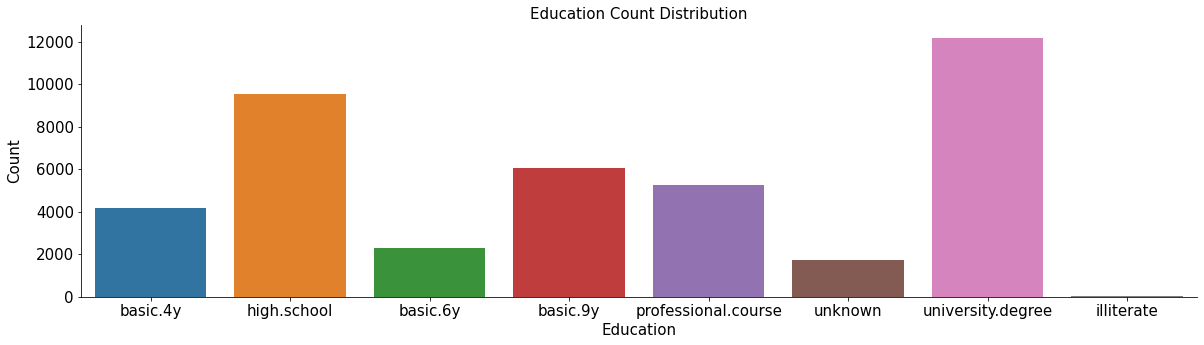

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = data_ext_full)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Loans, Housing Default

Another couple of questions we asked were:

* Default, has credit in default ?
* Housing, has housing loan ?
* Loan, has personal loan ?


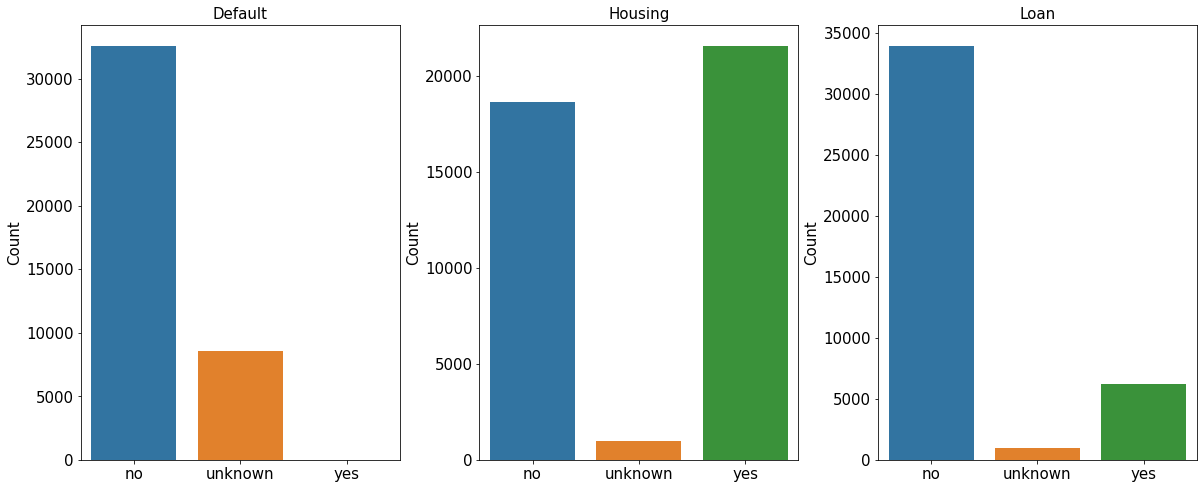

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = data_ext_full, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = data_ext_full, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = data_ext_full, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

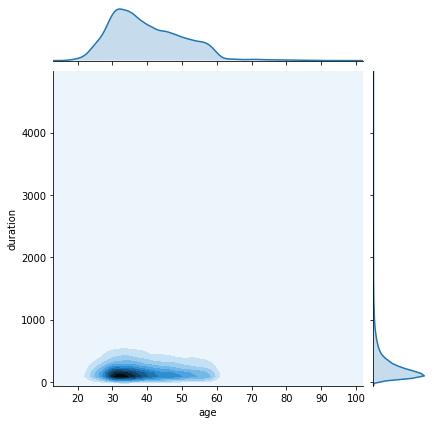

In [ ]:
sns.jointplot('age','duration',data=data_ext_full,kind='kde')

Here we can identify varius groups resultin by the interaction of euribor and consumer price index. 

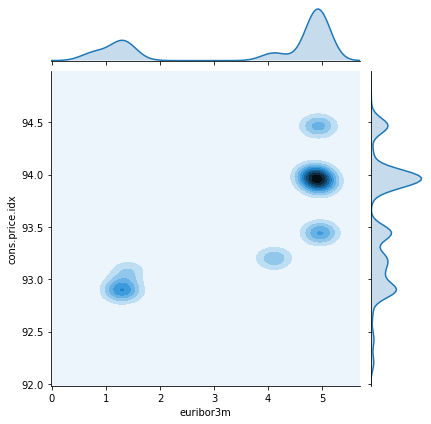

In [ ]:
sns.jointplot('euribor3m','cons.price.idx',data=data_ext_full,kind='kde')

Here we have plot of the age vs campaign wich represents the number of contacts performed during this campaign and for this client. Most of people contacted during the campaing are young.

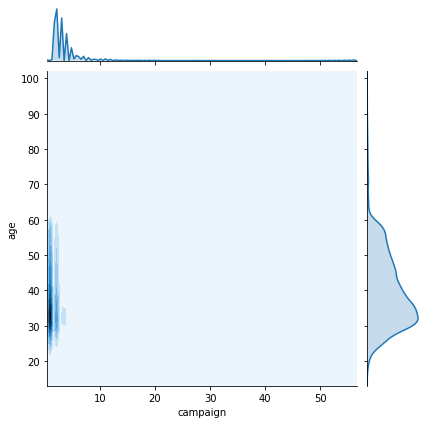

In [ ]:
sns.jointplot("campaign","age",data=data_ext_full,kind='kde')

## Data preprocessing
Data preprocessing is an important task to perform during a statistical analysis, especially if data presents inconsistencies and different data types.

In our case the data set provided has the following flaws:
* Data is generally not normally distributed;
* Many different cardinal categorical features, which will be one-hot encoded;
* Some ordinal categorical features, which will be label encoded.

To label categorical features, we study it's unique values composition:

In [ ]:
data_ext_full.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

So we have the following:
* job is ordinal;
* marital is cardinal;
* education is ordinal;
* default is cardinal;
* housing is cardinal;
* loan is cardinal;
* contact is cardinal;
* month is ordinal;
* day_of_week is ordinal;
* poutcome is cardinal;
* y is dichotomic;

As first thing: we now study wether two categorical features, like job and education, show some kind of attraction, via $\chi^2$ test.

Before doing that, we proceed with the contingency table, as shown below:



In [ ]:
educ_job_tab = pd.crosstab(data_ext_full.education,data_ext_full.job)

In [ ]:
data2 = data_ext_full.copy()

The above function allows us to compute multiple $\chi^2$ tests for each chosen feature on every other feature. Results are as follows:



In [ ]:
chi_sq(data2, 'y')

var1         var2  ...             decision       decision_proba
0    y          job  ...          (reject H0)          (reject H0)
1    y      marital  ...          (reject H0)          (reject H0)
2    y    education  ...          (reject H0)          (reject H0)
3    y      default  ...          (reject H0)          (reject H0)
4    y      housing  ...          (reject H0)          (reject H0)
5    y         loan  ...  (fail to reject H0)  (fail to reject H0)
6    y      contact  ...          (reject H0)          (reject H0)
7    y        month  ...          (reject H0)          (reject H0)
8    y  day_of_week  ...          (reject H0)          (reject H0)
9    y     poutcome  ...          (reject H0)          (reject H0)

[10 rows x 10 columns]

To further study each relationship, we ran the test on each categorical feature present in our dataset. The result are the following:

All features have dependencies, except for some couples, for which we fail to reject the $H_0$, that are:
* The relationships between job and loan
* The relationships between marital and loan

In [ ]:
data_new = {el: chi_sq(data_ext_full,tgt_col=el) for el in data_ext_full.select_dtypes('object').columns}

Here we perform an indipendence test also among features themselves.

In [ ]:
data_new['contact']

var1         var2  ...             decision       decision_proba
0  contact          job  ...          (reject H0)          (reject H0)
1  contact      marital  ...          (reject H0)          (reject H0)
2  contact    education  ...          (reject H0)          (reject H0)
3  contact      default  ...          (reject H0)          (reject H0)
4  contact      housing  ...          (reject H0)          (reject H0)
5  contact         loan  ...  (fail to reject H0)  (fail to reject H0)
6  contact        month  ...          (reject H0)          (reject H0)
7  contact  day_of_week  ...          (reject H0)          (reject H0)
8  contact     poutcome  ...          (reject H0)          (reject H0)
9  contact            y  ...          (reject H0)          (reject H0)

[10 rows x 10 columns]

###Values mapping

In order to encode ordinal variables with numerical labels, we first study the value counts of the variables, in order to find the composition of different feature. As it will be evident, the categorical features have all a majority class.<br><br>
Since it is a real-world dataset, one might think that the marketing campaign had, as primary target, a person who owned a degree and who was mainly an executive of a company. In contrast, the second most frequent class seems to be a person who has high school diploma and who seems to be a blue-collar.

From the multiple Pearson's $\chi^2$ test we launched before, it appears that job and education attract eachother.<br><br><br>

DOF | probability | critical | stat | p-value | significance | result |
----|-------------|----------|------|---------|--------------|--------|
49 | 0.950|66.339|288316.000 | 0.000 |0.050|job and education are Dependent (reject H0)

In [ ]:
data_ext_full.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
education_mapping={
    'illiterate':0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course':5,
    'university.degree':6,
    'unknown':-1
}
data_ext_full.education = data_ext_full.education.replace(education_mapping)

In [ ]:
data_ext_full.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
job_mapping={
    'housemaid':3, 
    'services':4, 
    'admin.':20, 
    'blue-collar':7, 
    'technician':6,
    'retired':1, 
    'management':10, 
    'unemployed':0, 
    'self-employed':5, 
    'unknown':-1,
    'entrepreneur':15, 
    'student':5}
data_ext_full.job = data_ext_full.job.replace(job_mapping)

In [ ]:
data_ext_full.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
month_mapping={
    'mar':3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12,
}
data_ext_full.month = data_ext_full.month.replace(month_mapping)

In [ ]:
data_ext_full.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
day_of_week_mapping={
'mon':1,
'tue':2,
'wed':3,
'thu':4,
'fri':5,

}
data_ext_full.day_of_week = data_ext_full.day_of_week.replace(day_of_week_mapping)

In [ ]:
df = pd.concat([pd.get_dummies(data_ext_full.select_dtypes('object'),drop_first=True),data_ext_full.select_dtypes(exclude='object')],axis=1)

Here is how the data set appear after mapping the ordinal features and after one-hot encoding (dropping first to avoid multicollinearity) the cardinal variables:

In [ ]:
df.head()

marital_married  marital_single  ...  euribor3m  nr.employed
0                1               0  ...      4.857       5191.0
1                1               0  ...      4.857       5191.0
2                1               0  ...      4.857       5191.0
3                1               0  ...      4.857       5191.0
4                1               0  ...      4.857       5191.0

[5 rows x 27 columns]

### Scaling features

In order to fasten convergence, we scale features. To understand why it is important scaling features, see the image below:

![alt text](https://image.slidesharecdn.com/coursera-2week-180518110357/95/coursera-2week-7-638.jpg?cb=1526641469)

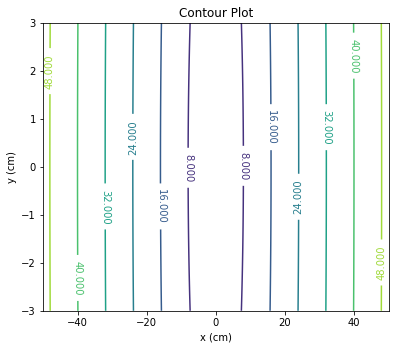

In [ ]:
#@title Without normalization, two variables can be like:
xlist = np.linspace(-50.0, 50.0, 100)
ylist = np.linspace(-3.0, 3.0, 150)
X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt(X**2 + Y**2)


fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True, 
          fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

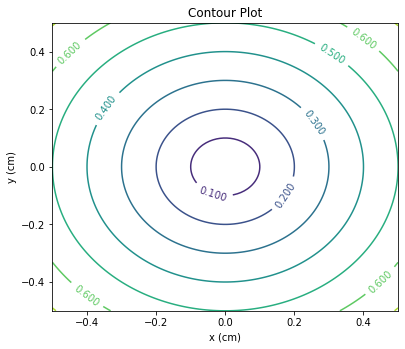

In [ ]:
#@title With normalization, instead:
xlist *= (xlist.max()-xlist.min())**(-1)
ylist *= (ylist.max()-ylist.min())**(-1)
X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt(X**2 + Y**2)


fig = plt.figure(figsize=(6,5))
left, bottom, width, height = -0.3, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True, 
          fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

Implying that the convergence is a lot faster. In the following, since numeric variables are not normally distributed (lots of outliers and at least some bivariate features), we use min max scaling.

In [ ]:
scaler = MinMaxScaler()

#Correlation Heatmap
After performing the scaling and the re-mapping of the fatures, thanks to seaborn module, we are ready to draw the following heat map which displays the Pearson's $\rho$ coefficient of linear correlation.

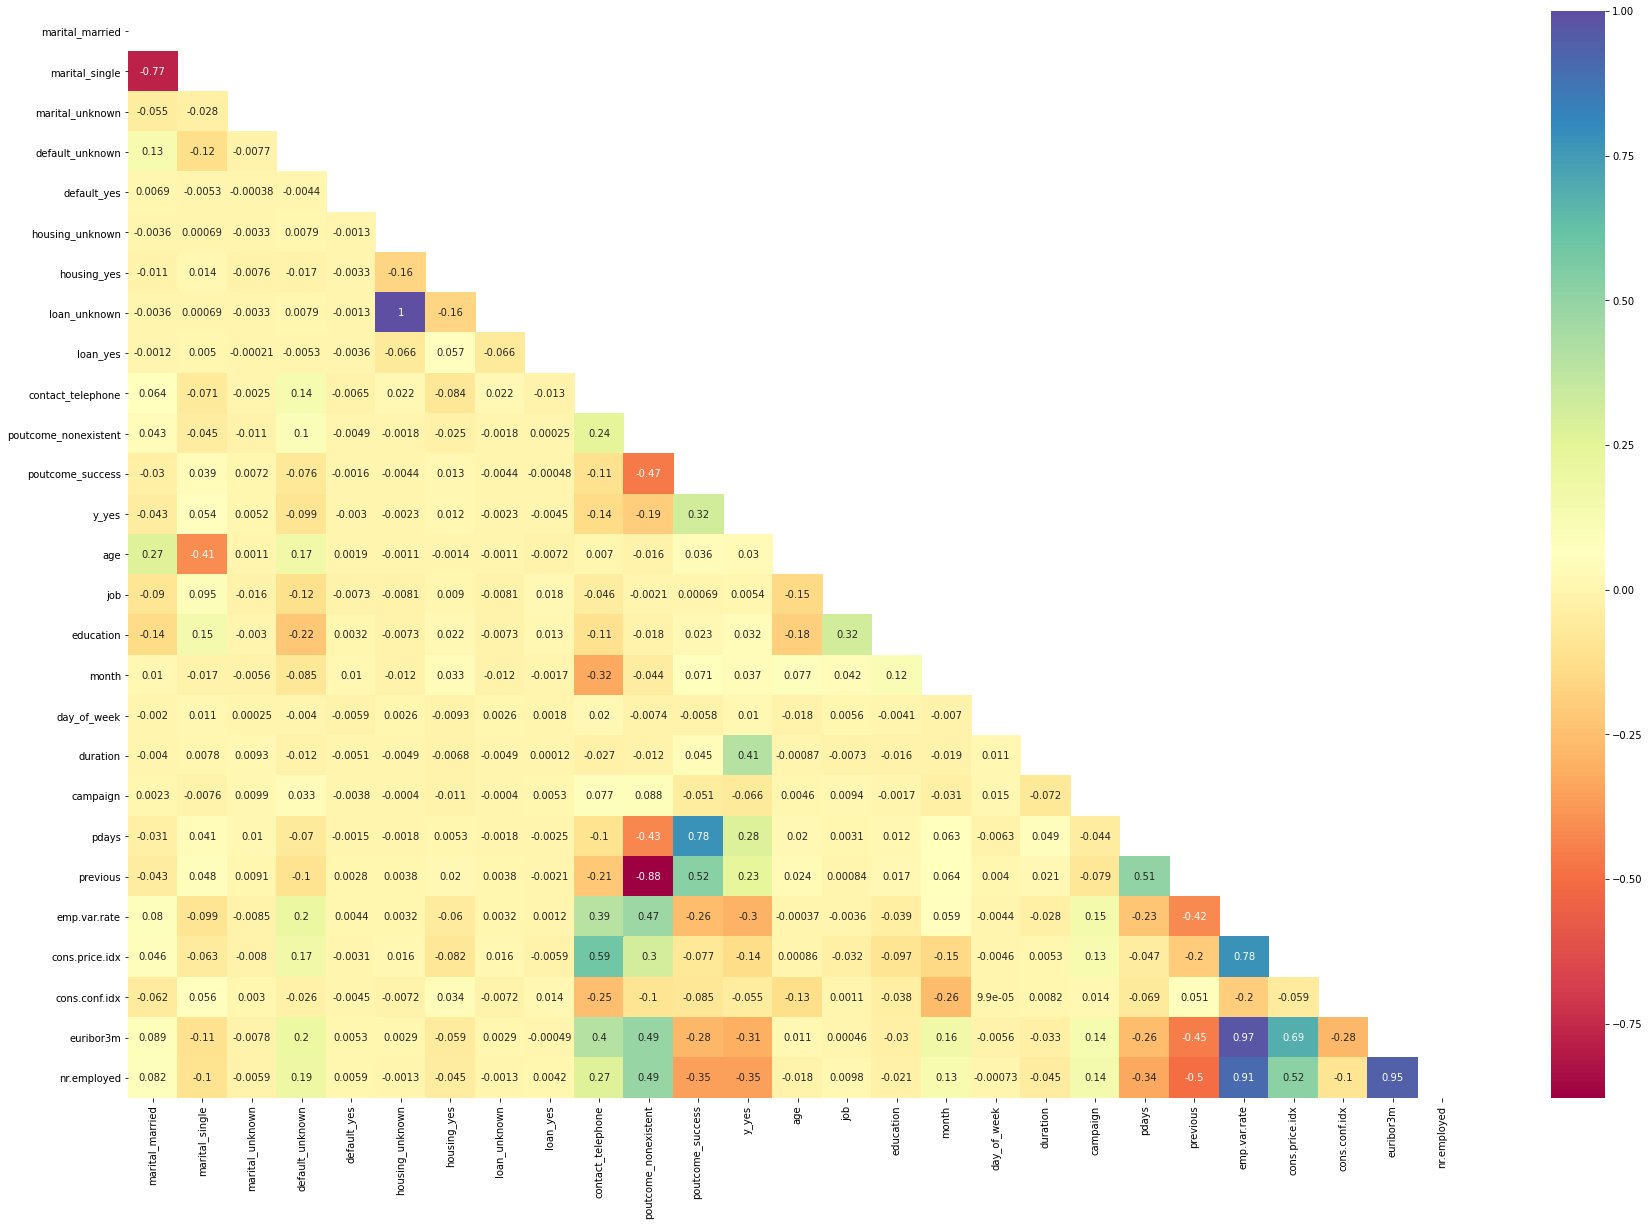

In [ ]:
plt.figure(figsize=(30,20))
mask = np.tril(df.shape)
sns.heatmap(df.corr(),annot=True,cmap="Spectral",mask = np.tril(np.ones(df.corr().shape)).T)

Some variables appear being collinear. Some insight might be caught by lookig at he followiong pairs:
* nonexistent/previous;
* poutcome_success/pdays;
* loan_unknown/housing unknown;
* emp.var.are/cons.price.idx;
* emp.var.rate/euribor3m;
* emp.var.rate/nr.employed;
* euribor3m/nr.emplyed.

Appear logic, after the previous examination of the outcome, that such variables shows some linear linkage, such behaviour is not good. 

Collinearity of two or more predictors means redundancy of informations that such predictors bring with them (classification may, of course, be affected by such situation). Some solutions might be followed:


1. Removal of one of the collinear variables, with the purpose (as said before) of removing redundant information;  
2. Combine the collinear variables together into a sigle predictor;
3. Model regularization.

In the following, we decided to opt for the last solution, even thought we might also have chosen a variable stepwise selection as well.



#Working on Data for Making Prediction

In the following part we present a set of statistical tools that helped us answering the statistical questions made at the beginning.

A KMeans clustering with 8 centroids (by default) is performed in order to group data up and discover eventual hidden patterns. Then, we perform an agglomerative cluster. The evidence by agglomerative cluster suggests that there are three different groups in this dataset.

In [ ]:
y = df.y_yes
X = df.drop('y_yes',axis=1)
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
clust = KMeans()

In [ ]:
md = clust.fit(X)

In [ ]:
pred = md.predict(X)

In [ ]:
pd.crosstab(pred, columns='')

row_0
0    4670
1    4656
2    3730
3    9040
4    3223
5    5571
6    4753
7    5545
Name: __dummy__, dtype: int64

#Choosing the best k

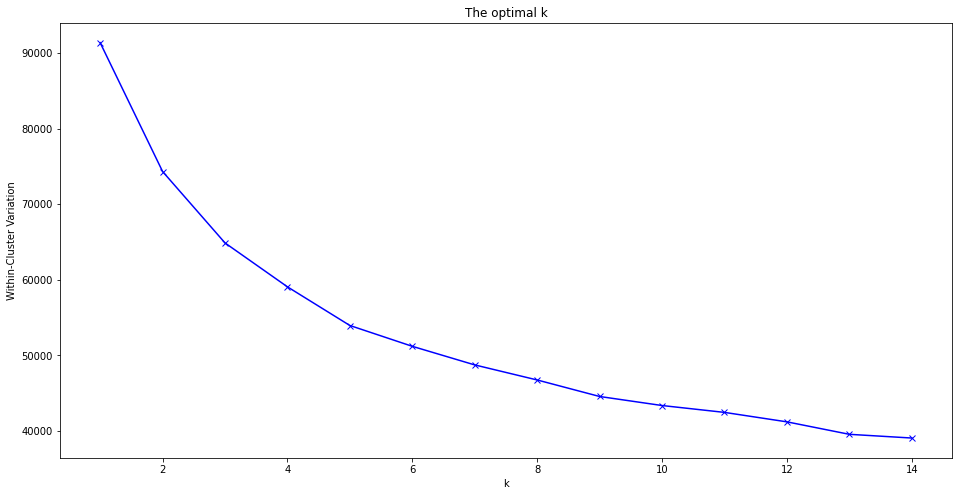

In [ ]:
np.random.seed(seed=30)
list_=range(1,15)
n_clusters=[]
i=0
for el in list_:
    kmeanModel = KMeans(n_clusters=el)
    kmeanModel.fit(X)
    n_clusters.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(list_, n_clusters, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-Cluster Variation')
plt.title('The optimal k')
plt.show()


The method used is known as `elbow method` is a very popular technique and the idea is to run k-means clustering for a range of clusters k (in our case from 1 to 15) and for each value, we are calculating the sum of squared distances from each point to its assigned center, the well known `within-cluster varation`.

When the `inertia` (or within-cluster variation) is plotted and the plot looks like an arm then the “elbow” (the point of inflection on the curve) is the best value of k.

The above plot suggest that the optimal number of clusters, i.e. centroids, is 5. This means that we might think to group our `n=41188` observations in 5 different groups.

The goal is to obtain the following relation : $$ min_{C_{1},...,C_{k}}\:[ \;\sum_{k=1}^{K} \frac{1}{|C_{k}|}\sum_{i,l \in C_{k}}\sum_{j=1}^{p}(x_{ij}-x_{lj})^2\;]$$

However, the absence of a clear elbow might suggest that K-means clustering, as well as Agglomerative clustering, is not suited to this problem. As seen before in the pairplot, there are no distinct clusters.

Now we can run the K-Means using the best number of clusters.

In [ ]:
np.random.seed(seed=31)
y = df.y_yes
X = df.drop('y_yes',axis=1)
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
clust = KMeans(n_clusters=3)
md = clust.fit(X)
pred = md.predict(X)
pred=pd.crosstab(pred, columns='' )
pred

row_0
0    13521
1    17606
2    10061
Name: __dummy__, dtype: int64

Here we shows the results of the fitting procedure. This are the 3 clusters obtained.

#Hierarchical Clustering
Despite K-Means, `Hierarchical clustering` does not need the pre-specification of the number K of the clusters.

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
model = AgglomerativeClustering(distance_threshold=10, n_clusters=None)

model = model.fit(X)

We now plot the `dendrogram`.

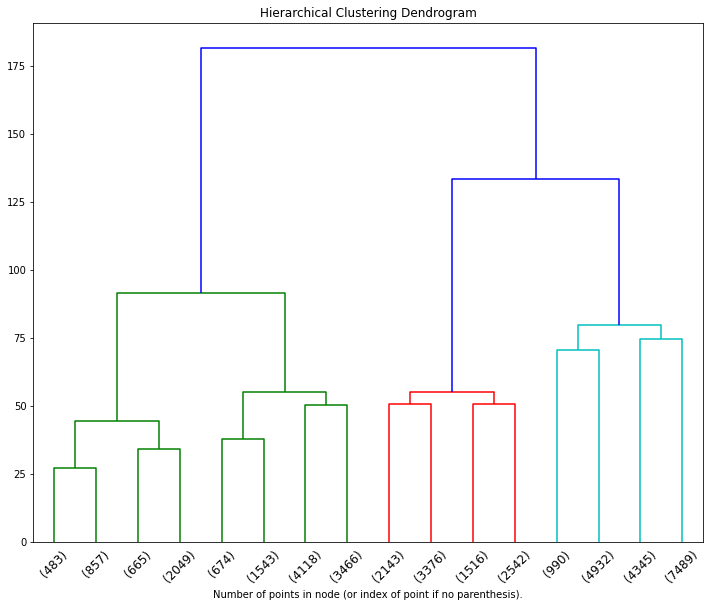

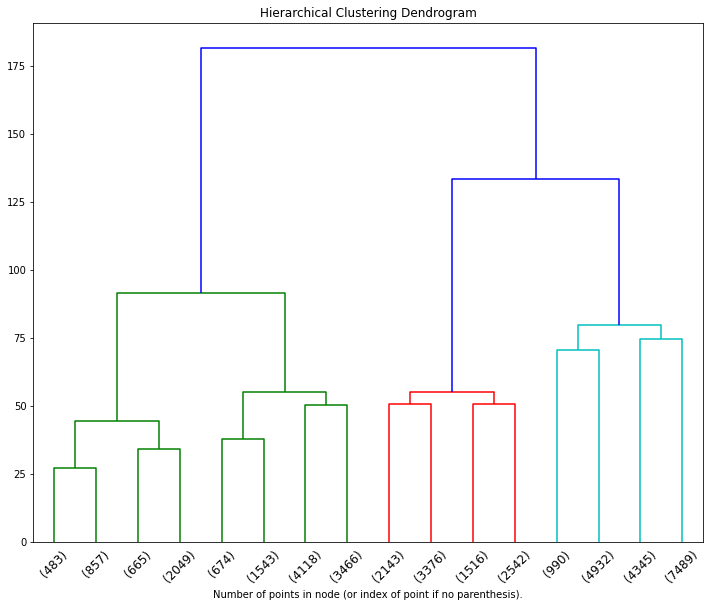

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.tight_layout()
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=45)
plt.show()

Please note that the labels indicate the dataframe's row index.
As result, from the above graph, we can conclude that our n-samples can be divided into 3 groups. This result contraddicts the previous finding of the best K, via "The Elbow method", for the K-means Clustering.

#Some Classification Models

In [ ]:
np.random.seed(seed=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

To check that the variables are equally distributed between train and test set, we proceed with the following plot. Variables result being equally distributed.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


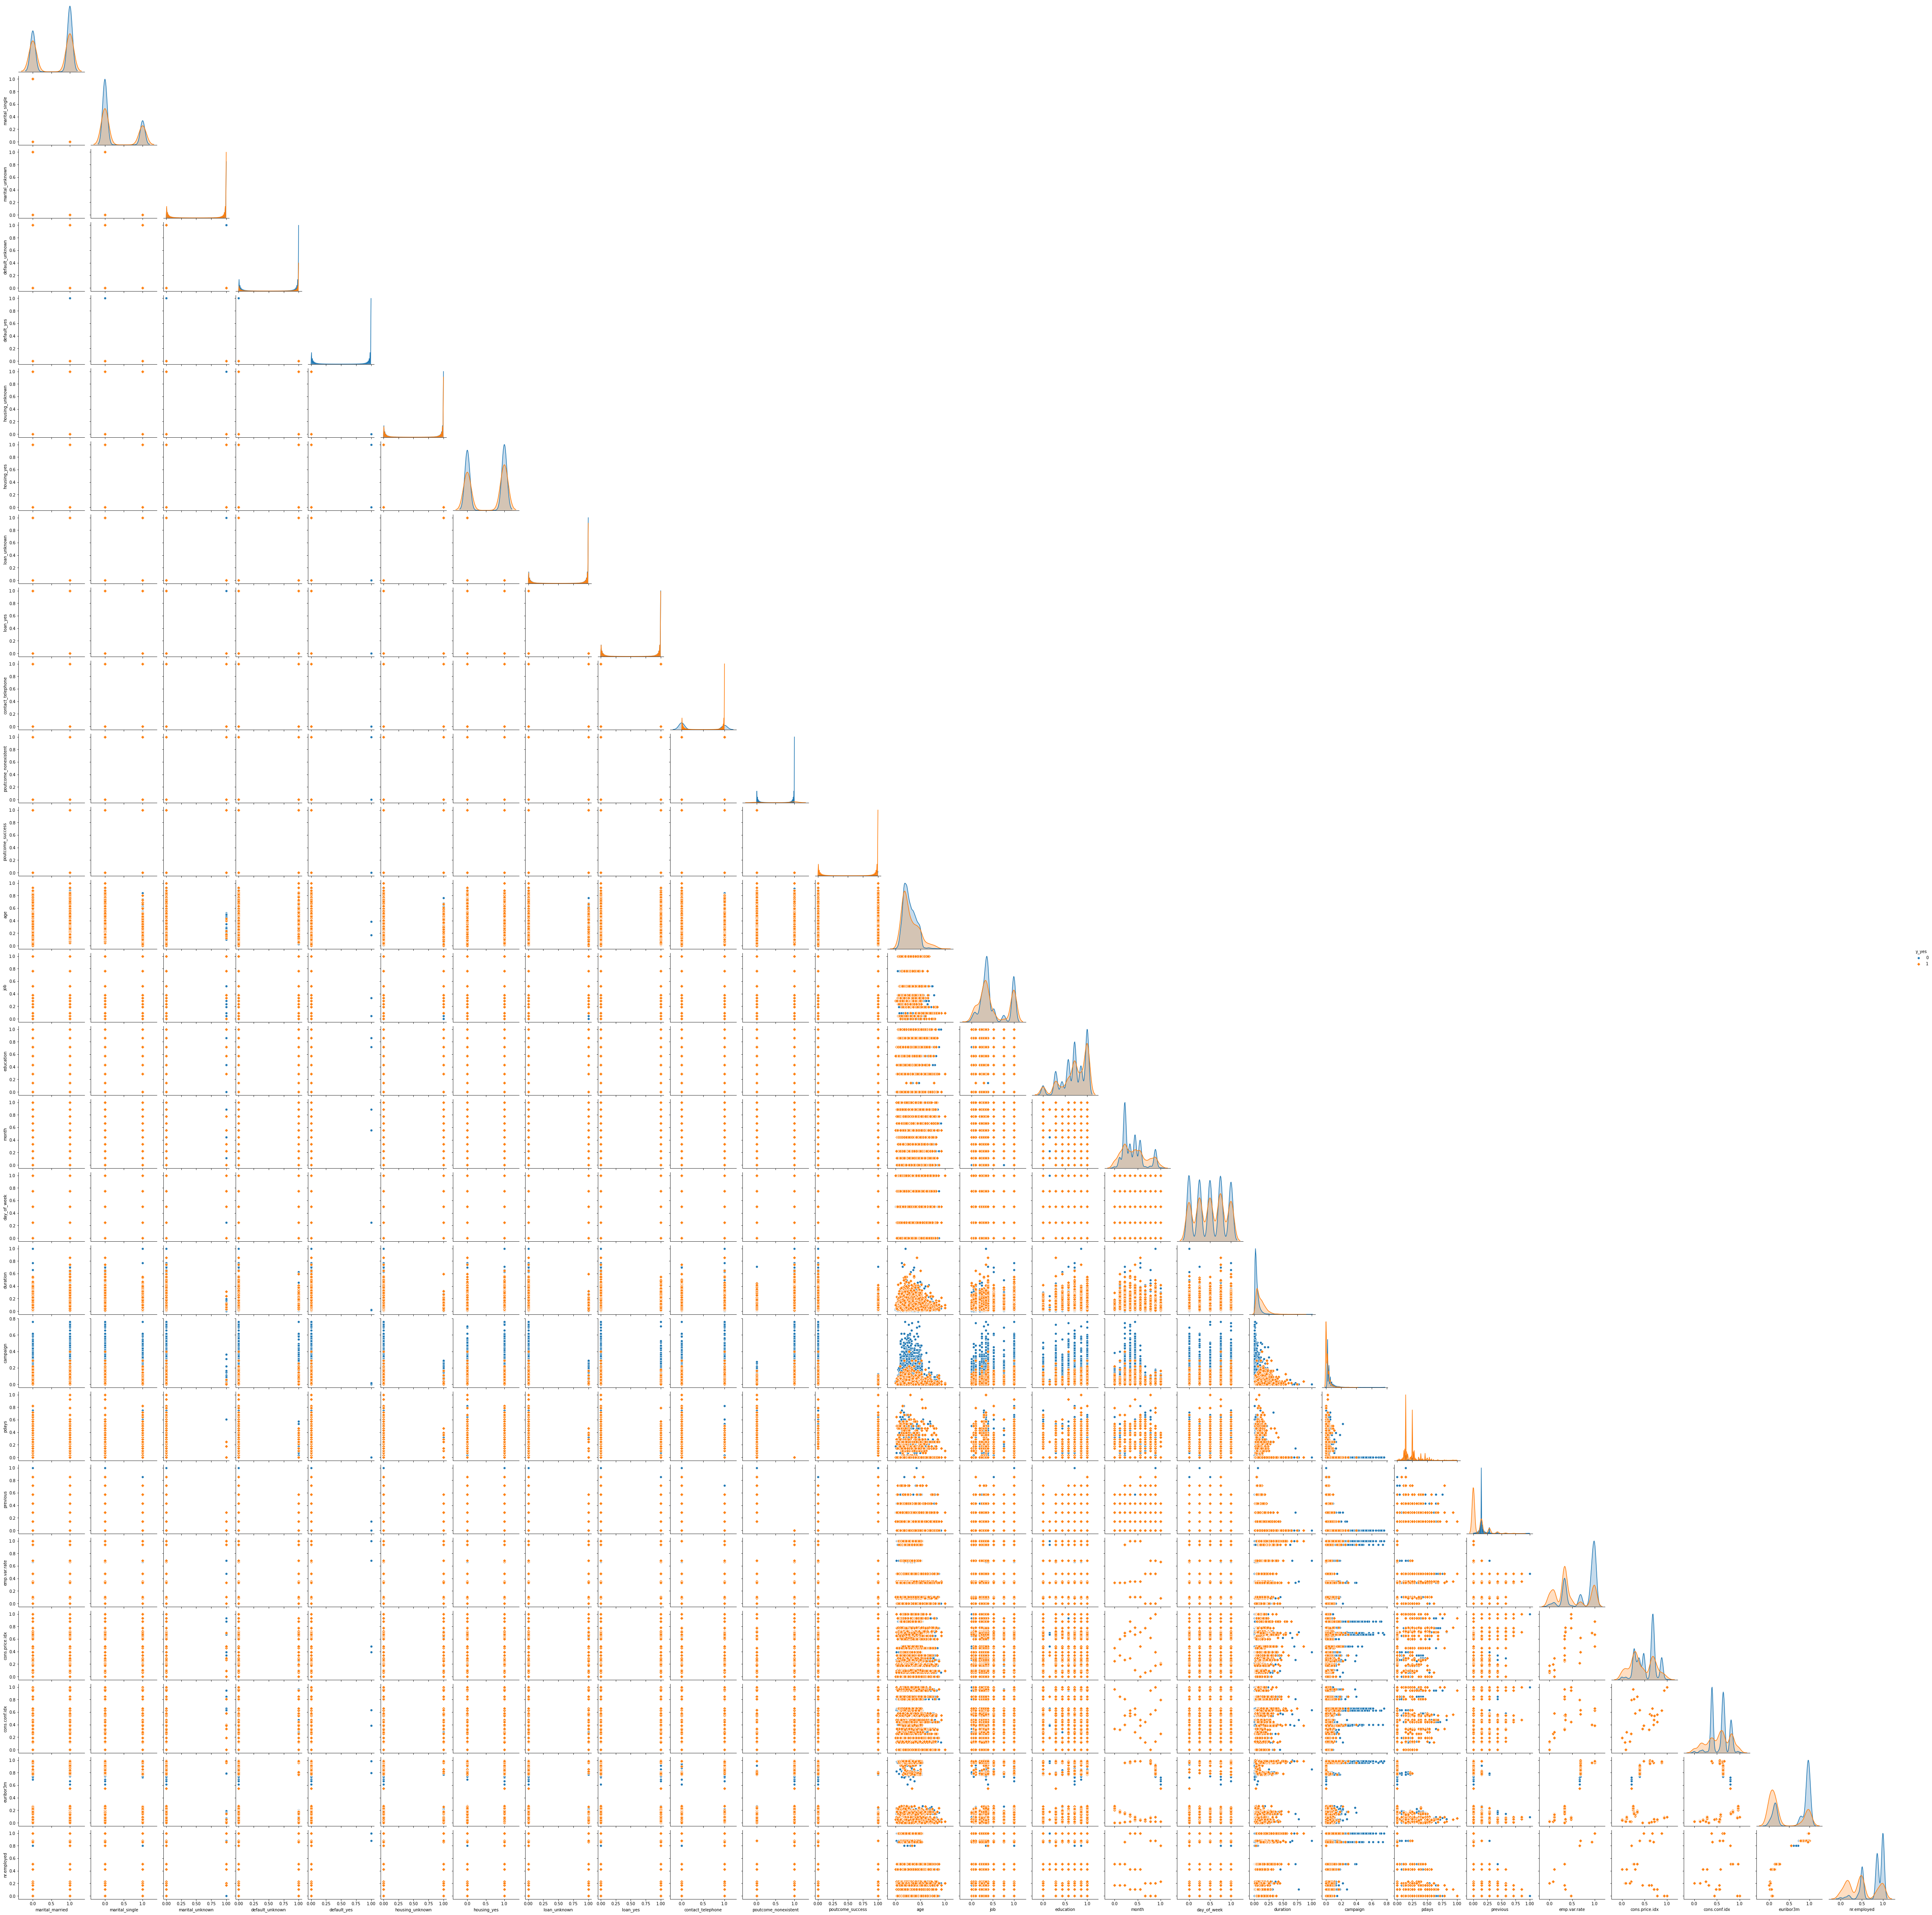

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


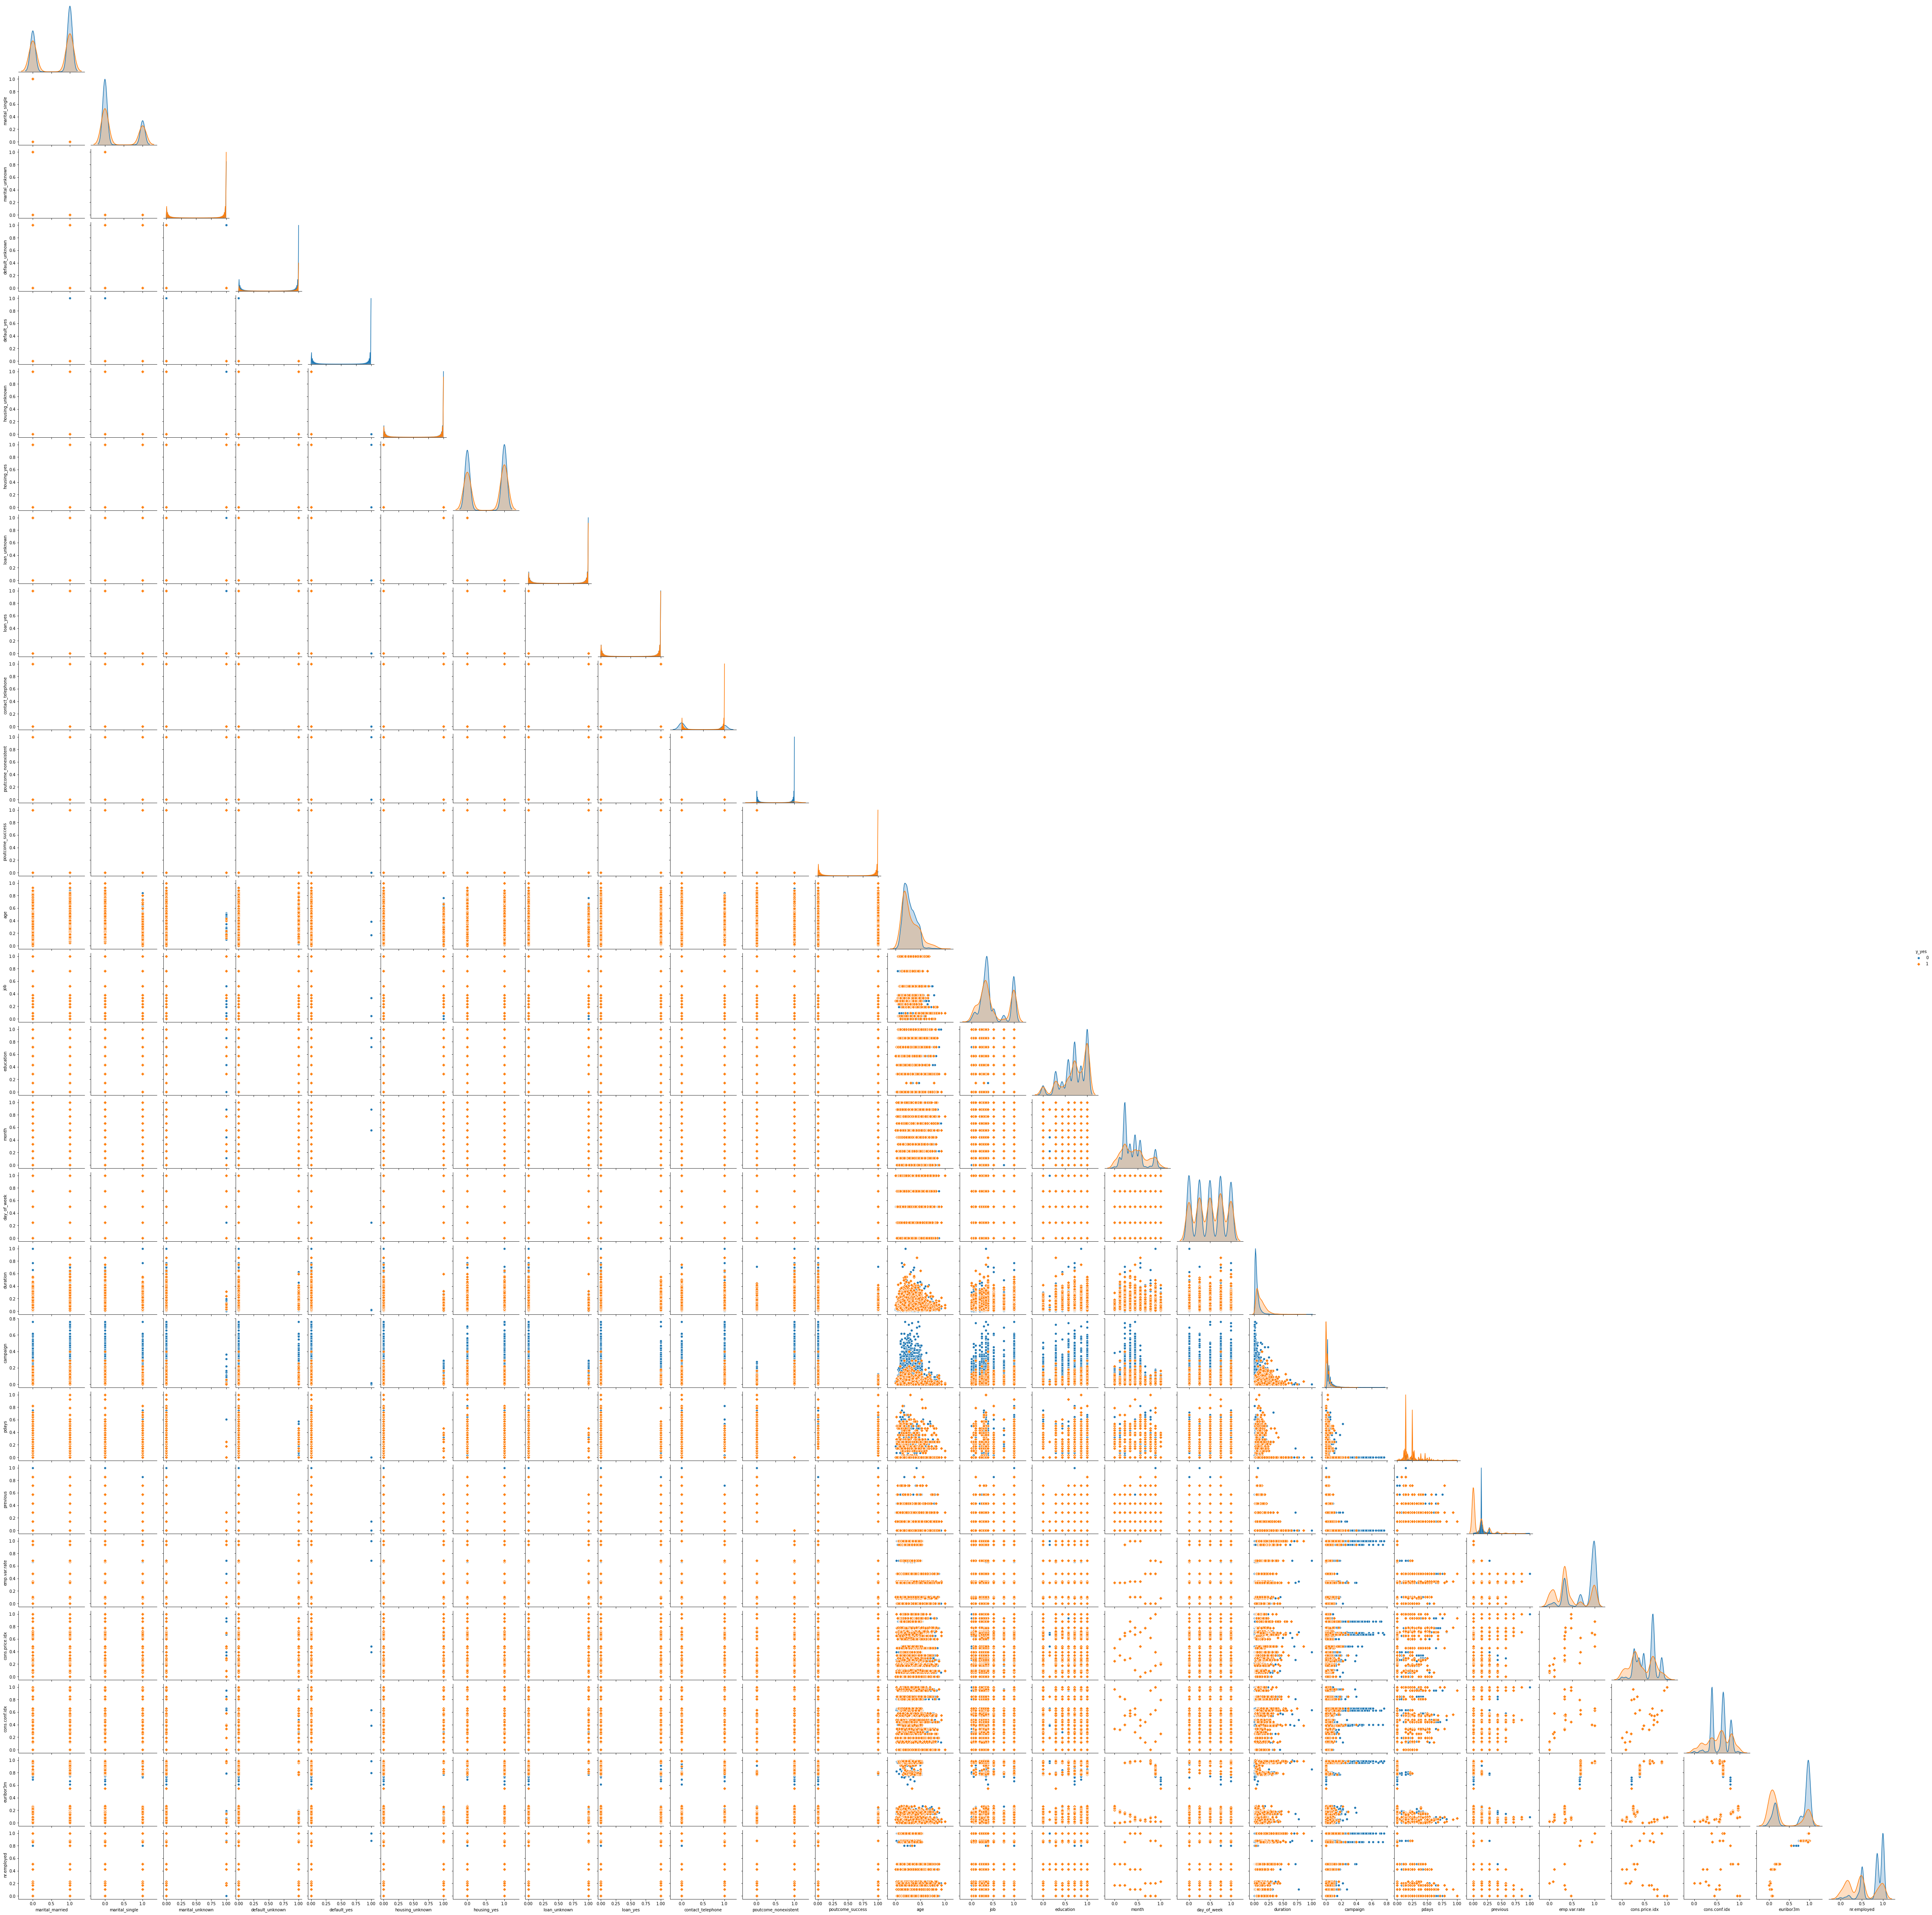

In [ ]:
#@title  Train set pairplot
sns.pairplot(pd.concat([X_train,y_train],axis=1),diag_kind='kde',hue='y_yes',corner=True,markers=['o','D'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


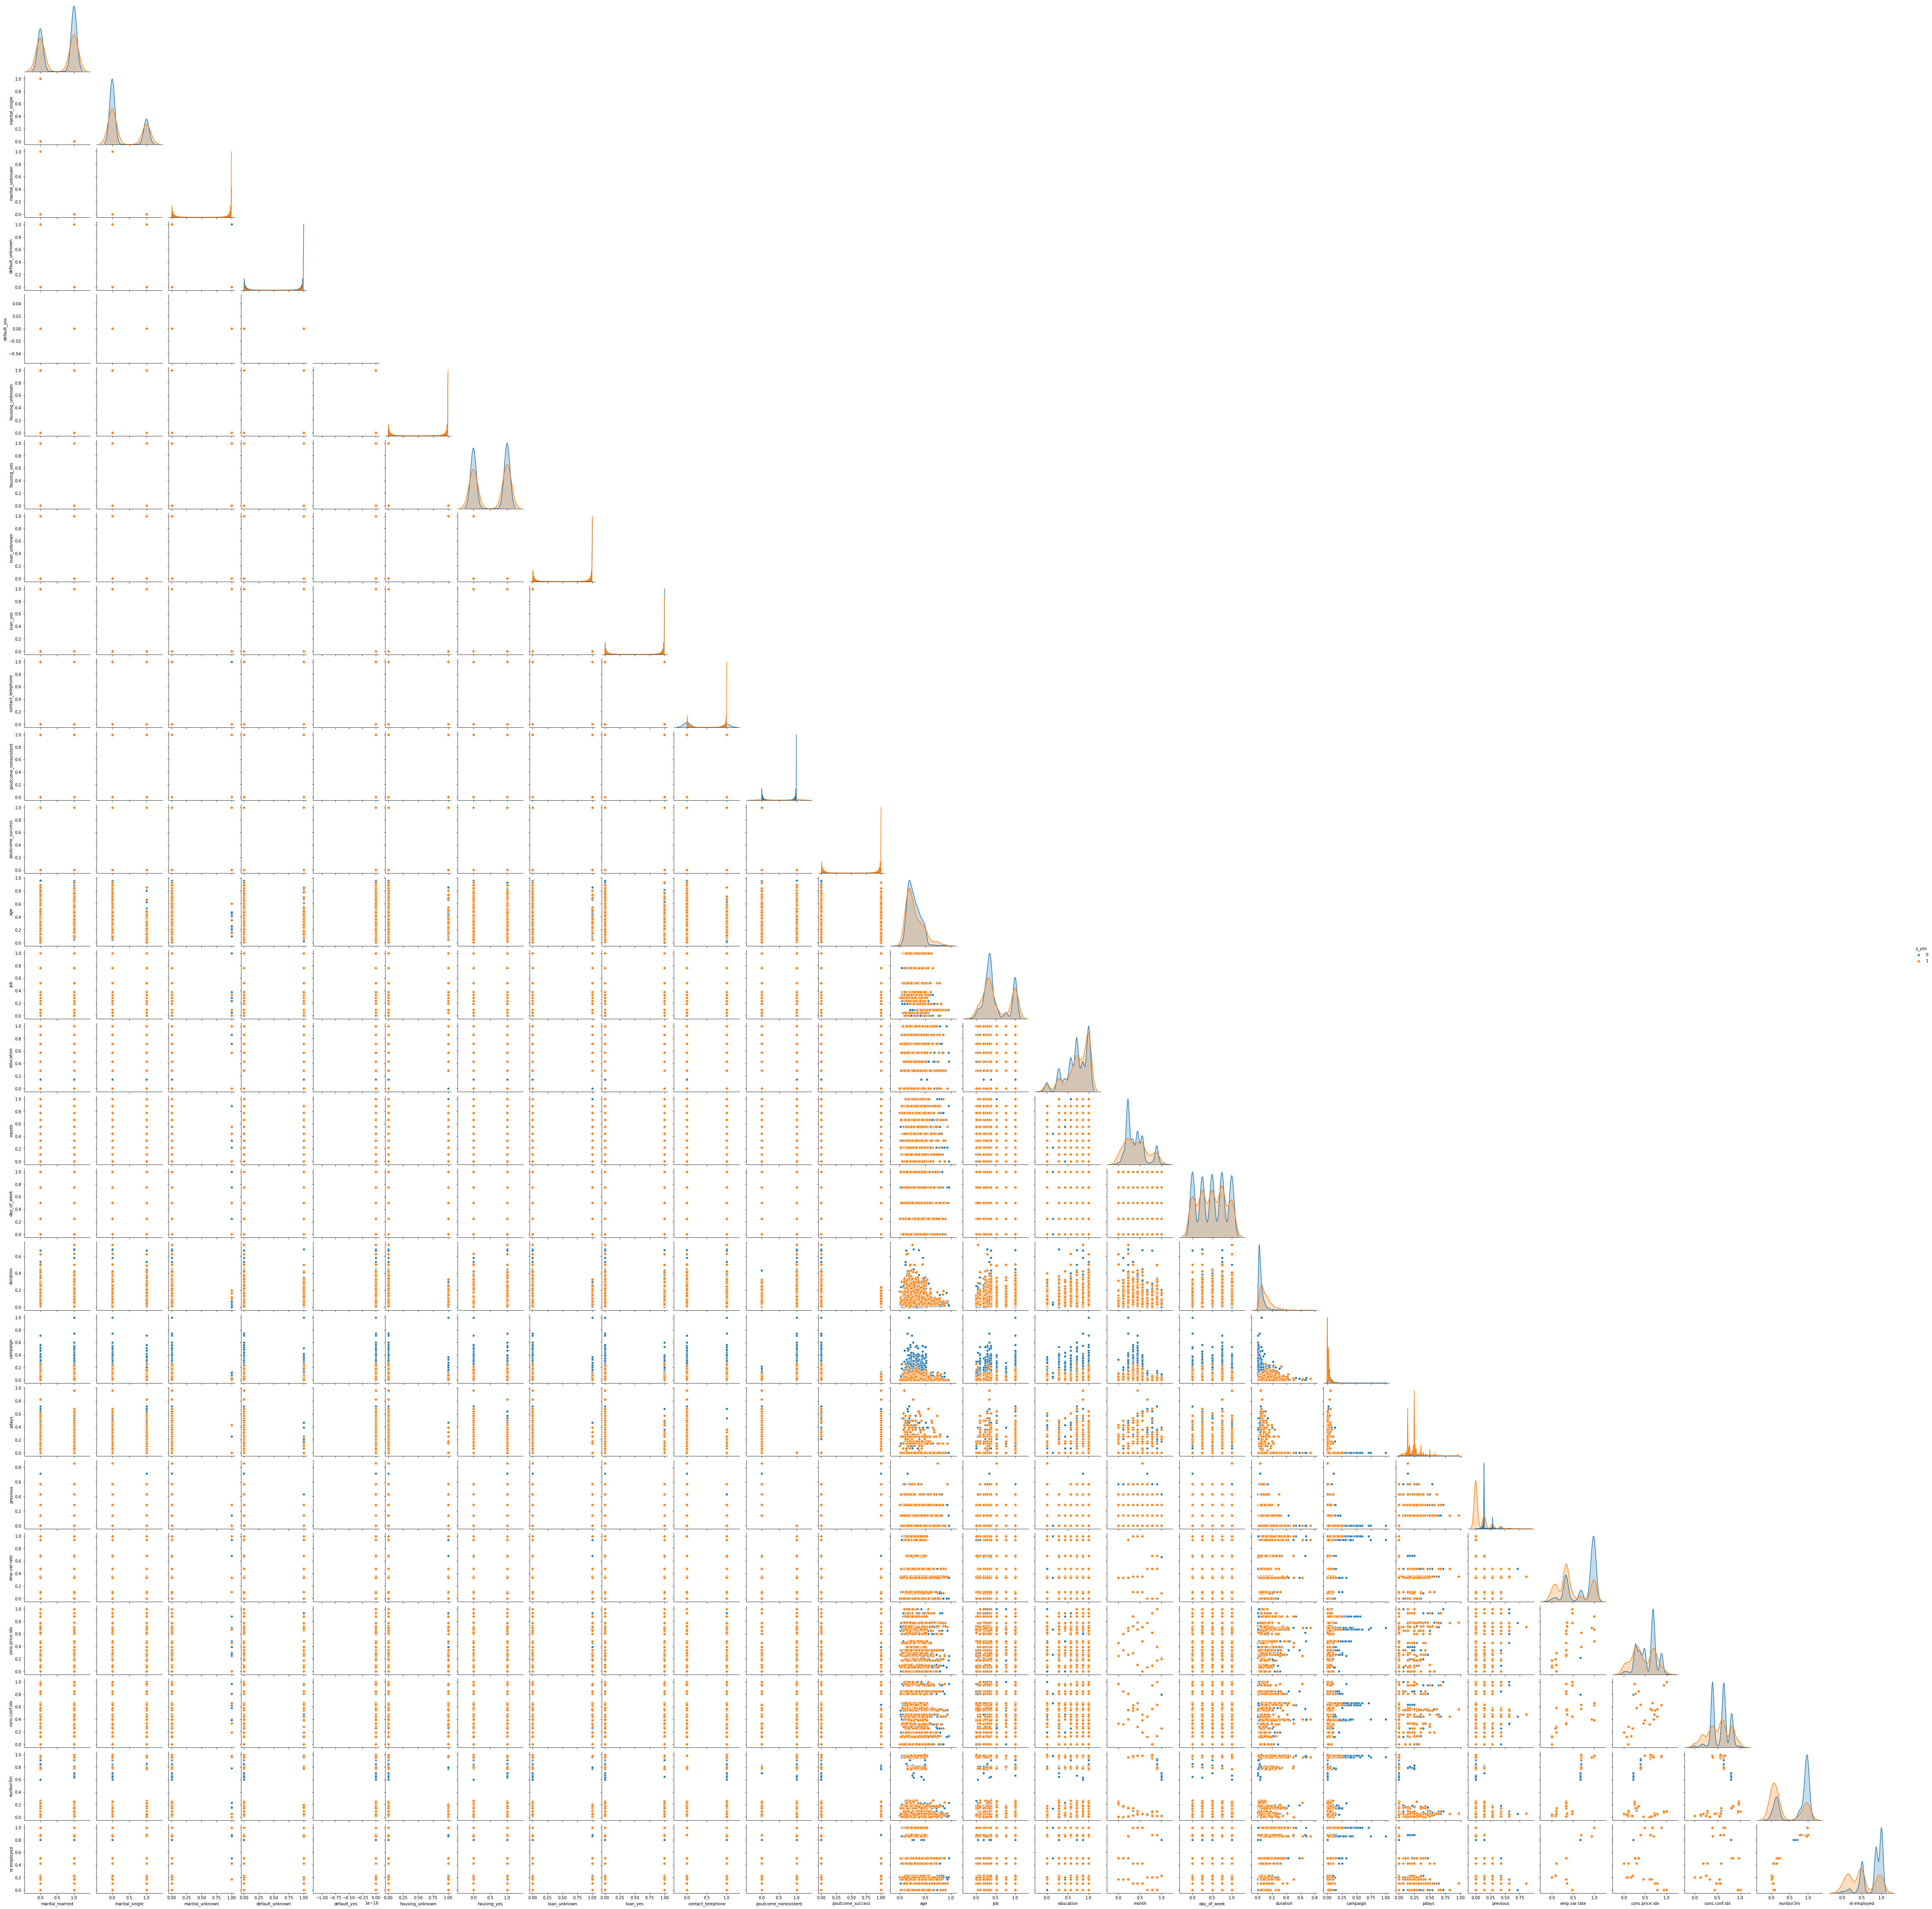

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


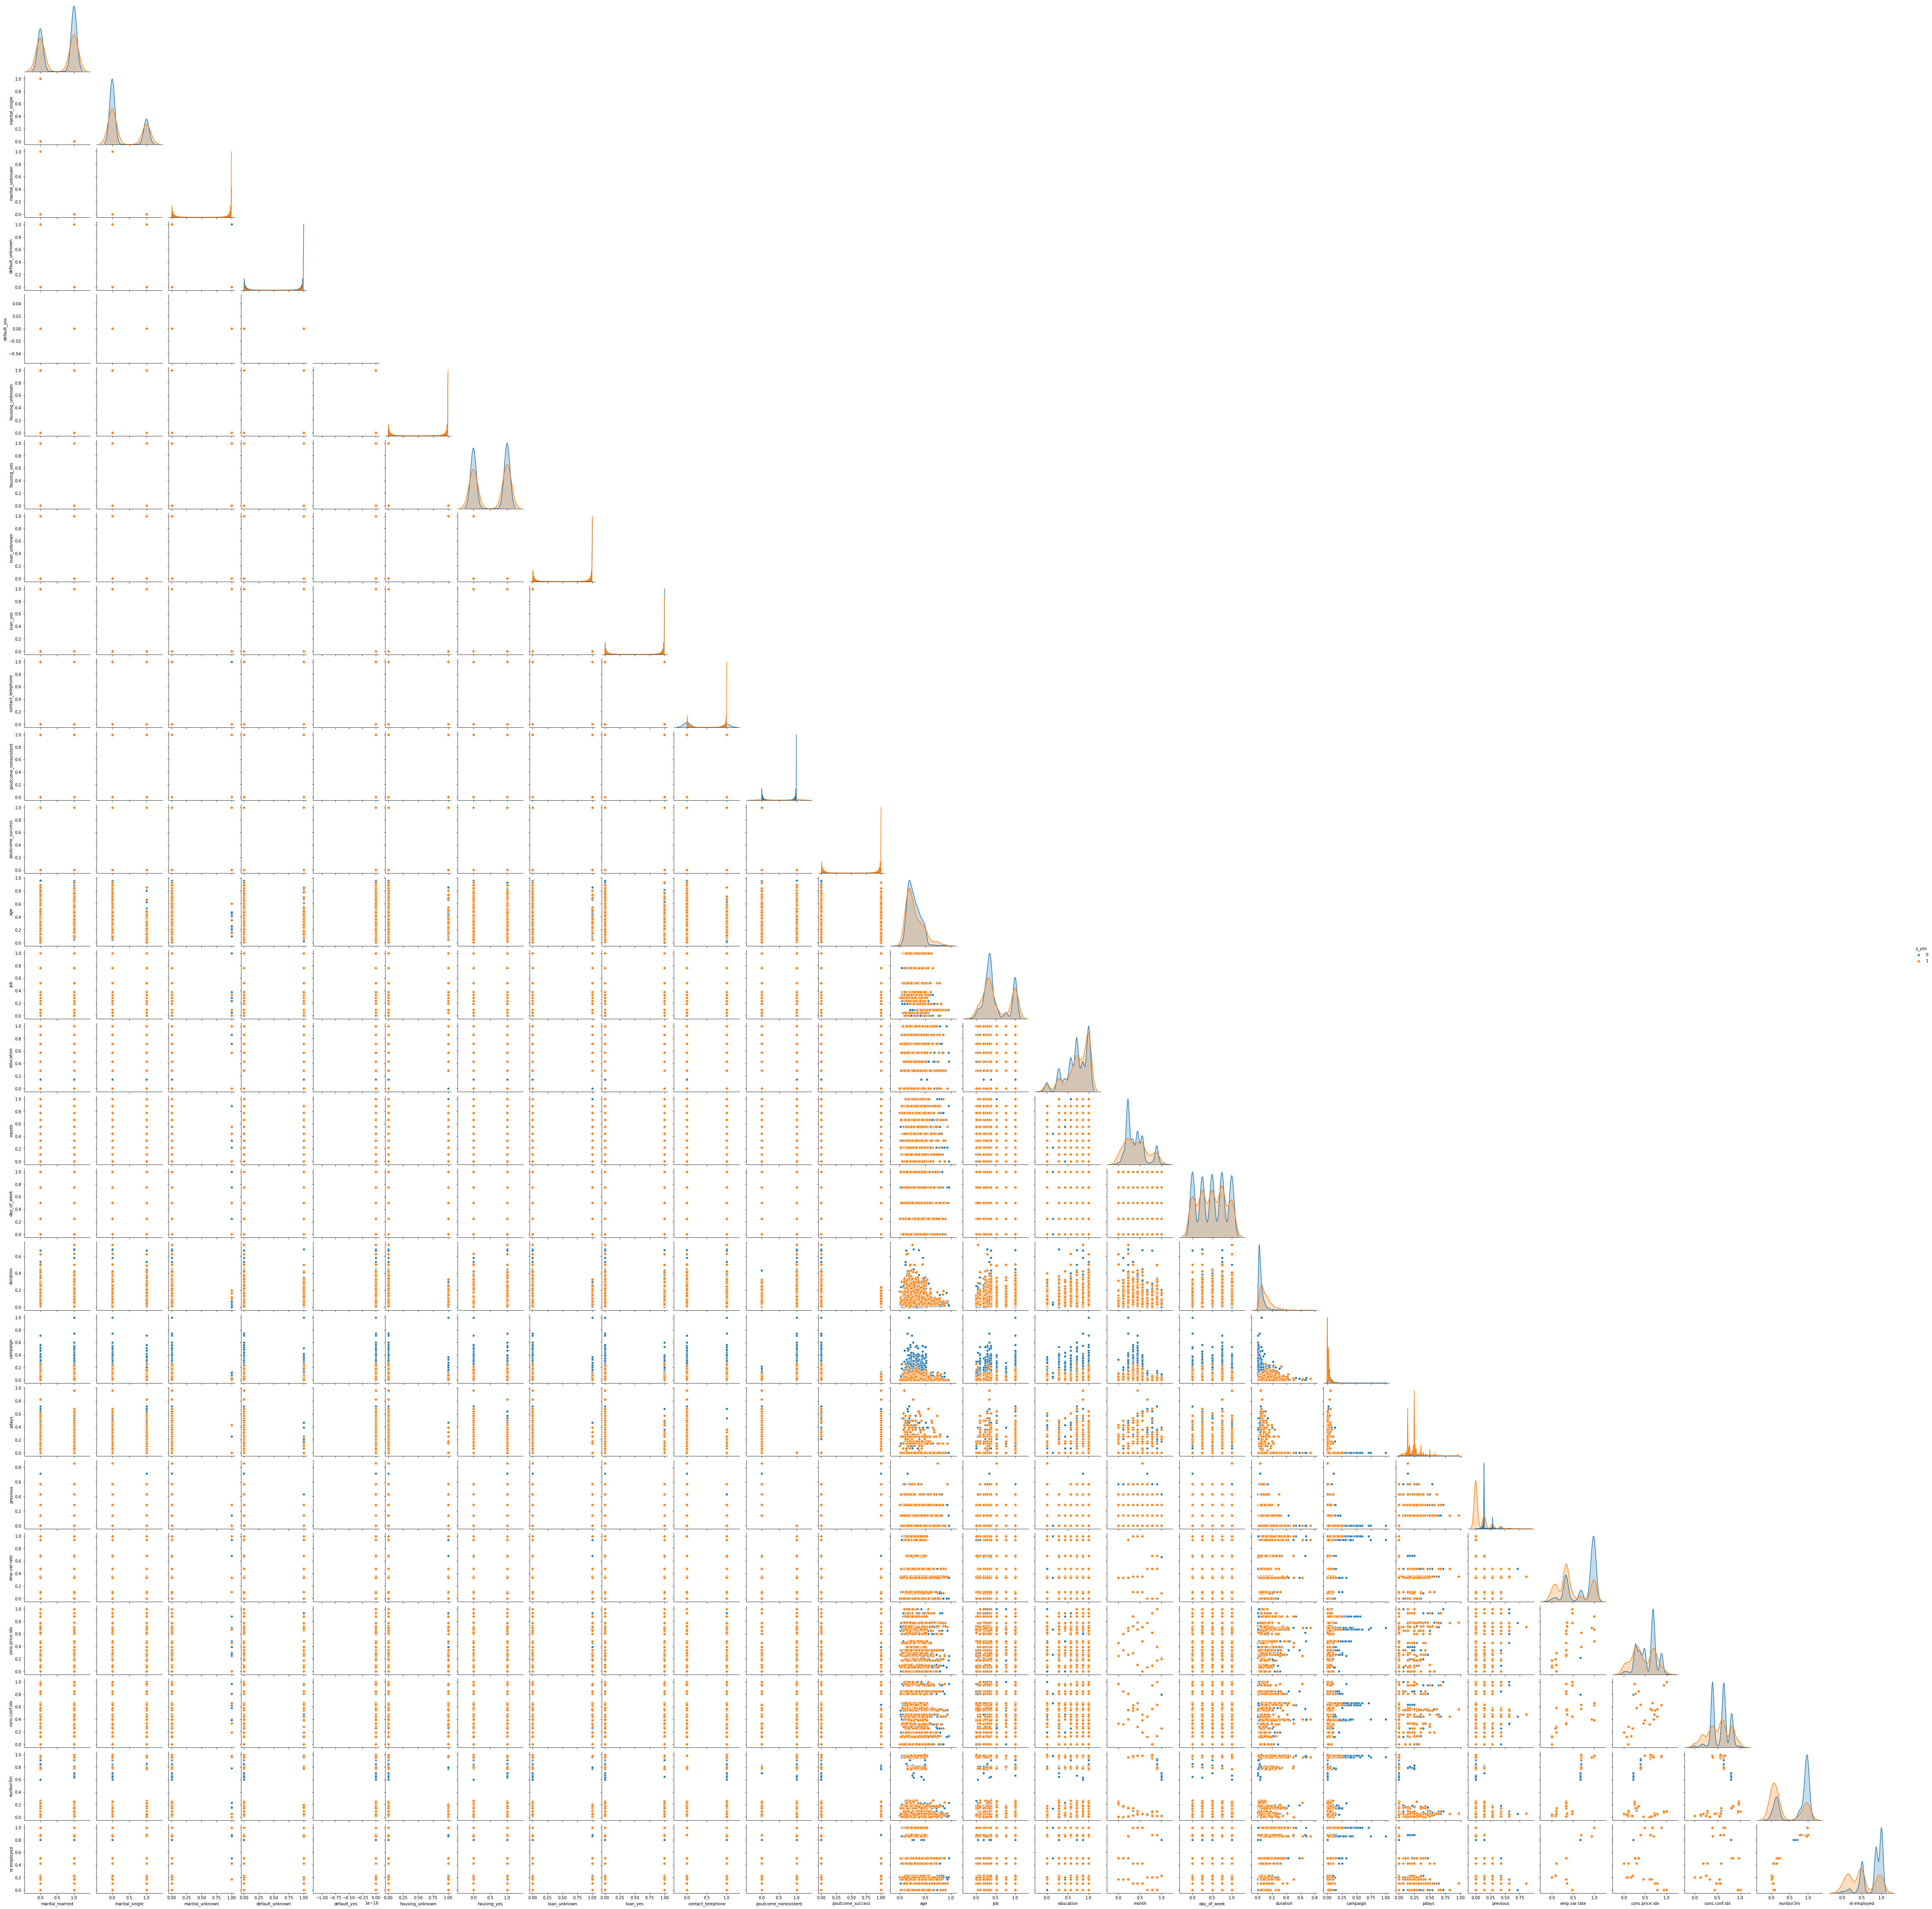

In [ ]:
#@title  Test set pairplot
sns.pairplot(pd.concat([X_test,y_test],axis=1),diag_kind='kde',hue='y_yes',corner=True,markers=['o','D'])

### First Classifier: Logistic Regression

We now try to use Logistic Regression with different types of regularization. We'd like to point out that this is just to show one of the many techniques used during pre-production of a model, since the data fall out the Logistic regression's assumptions (in particular for normality, homosckedasticity and in general for the spherical error). This makes the predictors weak and, as a result, it seems that the lesser regularized the model is, the lower the loss.

We fit the logistic regression on numeric data only.

In [ ]:
num_cols = data_ext_full.select_dtypes(exclude='object').columns[:-1]

In [ ]:
X_train.head()

marital_married  marital_single  ...  euribor3m  nr.employed
23453              1.0             0.0  ...   0.981637     1.000000
780                1.0             0.0  ...   0.957153     0.859735
38907              1.0             0.0  ...   0.018590     0.203781
33592              0.0             1.0  ...   0.148946     0.512287
8162               0.0             0.0  ...   0.958966     1.000000

[5 rows x 26 columns]

marital_married  marital_single  ...  euribor3m  nr.employed
23453              1.0             0.0  ...   0.981637     1.000000
780                1.0             0.0  ...   0.957153     0.859735
38907              1.0             0.0  ...   0.018590     0.203781
33592              0.0             1.0  ...   0.148946     0.512287
8162               0.0             0.0  ...   0.958966     1.000000

[5 rows x 26 columns]

In [ ]:
list_= np.linspace(0.0001,1,num=200)
accuracy_test = []
accuracy_train = []
loss_train = []
loss_test = []
i_value = []
val_f1 = []

for i in list_:

  model=LogisticRegression(C=i,max_iter=500) 
  model.fit(X_train[num_cols],y_train) 
  predict_train=model.predict(X_train[num_cols])
  predict_test=model.predict(X_test[num_cols])
                   
                                                    
  accuracy_train.append(accuracy_score(y_train, predict_train))
  accuracy_test.append(accuracy_score(y_test, predict_test))
  loss_train.append(log_loss(y_train, predict_train))
  loss_test.append(log_loss(y_test, predict_test))
  val_f1.append(f1_score(y_test, predict_test))

In [ ]:
confmat=confusion_matrix(y_test,predict_test)
confmat

array([[8934,  203],
       [ 786,  374]])

array([[8934,  203],
       [ 786,  374]])

[]

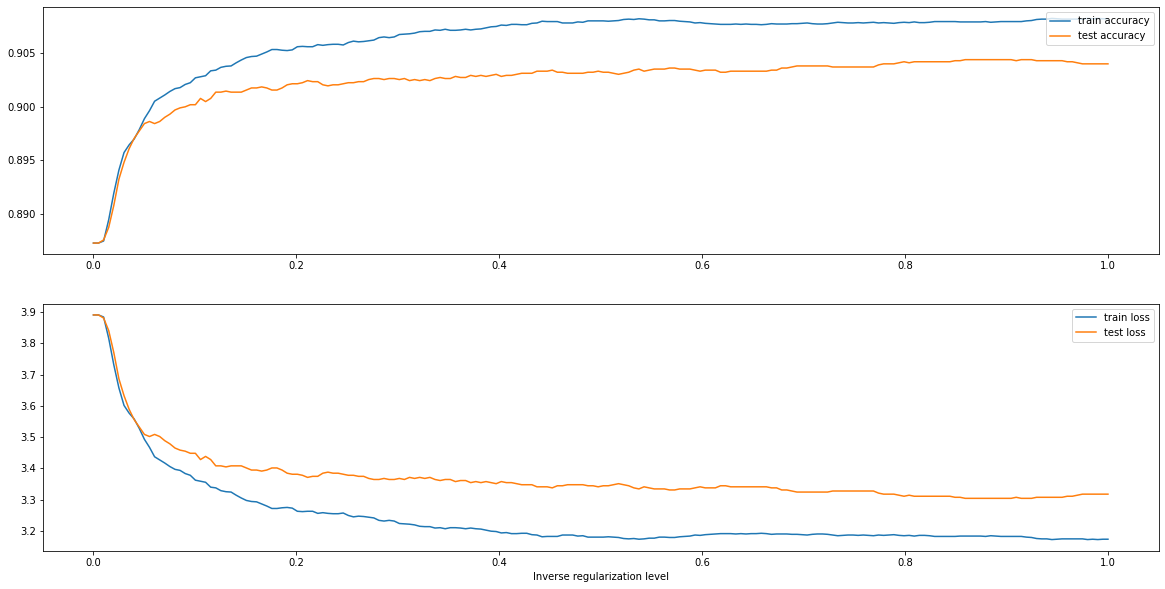

[]

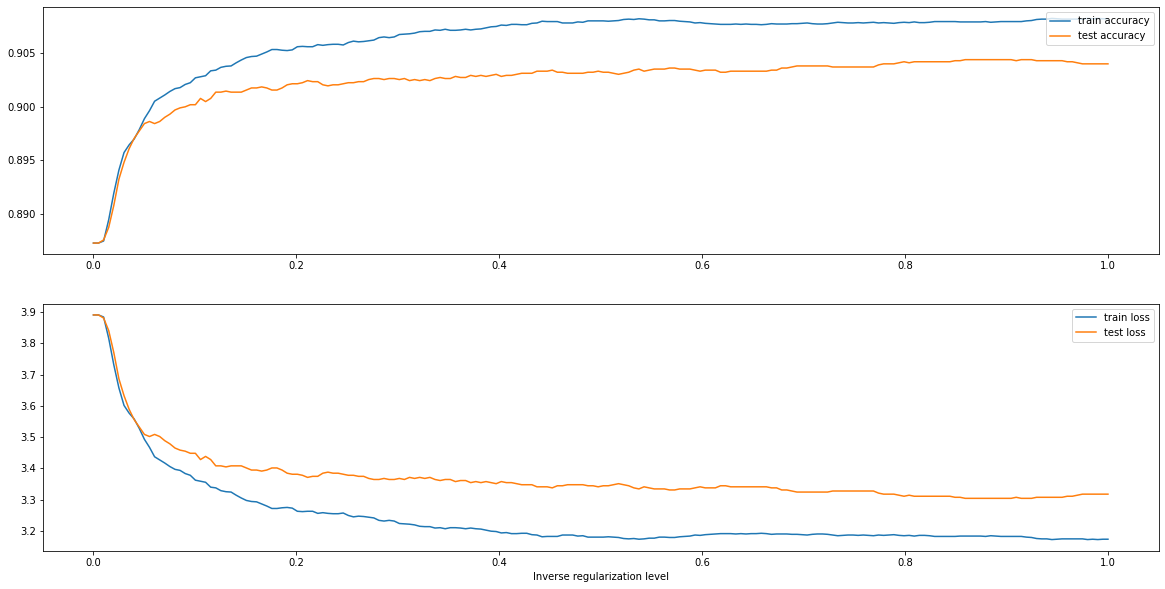

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (20,10))
axs[0].plot(list_, accuracy_train, label='train accuracy')
axs[0].plot(list_, accuracy_test, label='test accuracy')
axs[0].legend(loc="upper right")
axs[1].plot(list_,loss_train, label='train loss')
axs[1].plot(list_,loss_test,label='test loss')
axs[1].legend(loc="upper right")
plt.xlabel('Inverse regularization level')
plt.plot()
plt.plot()

As it is possible to notice, the best loss score is reached with the following regularization parameter, given a default learning rate:

In [ ]:
np.round(list_[loss_test.index(min(loss_test))],decimals=3)

0.859

0.859

The story suggested seems to be: Before level C equal to `0.05537`, the model has an improvement as regularization decreases, while after that, it has an evident overfitting problem due to increased complexity of the model.

How is regularization computed? Scikit-learn computes C as the inverse coefficient for regularization. Therefore, being the standard regularization as:$$L(\hat{\theta}) = y\ln(h(\hat{\theta}))+(1-y)\ln(1-h(\hat{\theta})) + \lambda \sum_{i=1}^{I}||\hat{\theta}||_{n\in\{1,2\}}$$

with the norm being L1 or L2. Logistic in scikit-learn uses by default an L1 norm.

While our coefficient C defined in scikit-learn is:
$$C=\frac{1}{\lambda}$$

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
folds=list(range(3,11))
for el in folds:
  kfold =KFold(n_splits=el)
  logistic= LogisticRegression(C=list_[loss_test.index(min(loss_test))],max_iter=1000)
  results_kfold = cross_val_score(logistic, X, y, cv=kfold)
  print(f"CV Score with {el} folds is: {np.round(results_kfold.mean(),decimals=3)}" )

CV Score with 3 folds is: 0.888
CV Score with 4 folds is: 0.891
CV Score with 5 folds is: 0.891
CV Score with 6 folds is: 0.89
CV Score with 7 folds is: 0.891
CV Score with 8 folds is: 0.891
CV Score with 9 folds is: 0.893
CV Score with 10 folds is: 0.893
CV Score with 3 folds is: 0.888
CV Score with 4 folds is: 0.891
CV Score with 5 folds is: 0.891
CV Score with 6 folds is: 0.89
CV Score with 7 folds is: 0.891
CV Score with 8 folds is: 0.891
CV Score with 9 folds is: 0.893
CV Score with 10 folds is: 0.893


## Second Classifier: Decision Tree

In [ ]:
model1=DecisionTreeClassifier(min_impurity_decrease=0.003,min_samples_leaf=2)

In [ ]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.003, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.003, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predict_train=model1.predict(X_train)
predict_test=model1.predict(X_test)

In [ ]:
accuracy_train=accuracy_score(y_train, predict_train)
accuracy_test=accuracy_score(y_test, predict_test)
f1_test = f1_score(y_test,predict_test)

In [ ]:
print(f'ACCURACY SCORES:\n-Train: {np.round(accuracy_train,3)}\n-Test: {np.round(accuracy_test,decimals=3)}\n\nF1 SCORE test:{np.round(f1_test,decimals=3)}')

ACCURACY SCORES:
-Train: 0.904
-Test: 0.902

F1 SCORE test:0.484
ACCURACY SCORES:
-Train: 0.904
-Test: 0.902

F1 SCORE test:0.484


In [ ]:
confmat=confusion_matrix(y_test,predict_test)
confmat

array([[8820,  317],
       [ 688,  472]])

array([[8820,  317],
       [ 688,  472]])

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and do not generalizing well to new data. Limiting the
depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set. Therefore, we proceed in pruning the train and test set. This is an issue common in decision trees, since their algorythm tend to adapt almost perfectly to training data, if not controlled in theyr growth.

[]

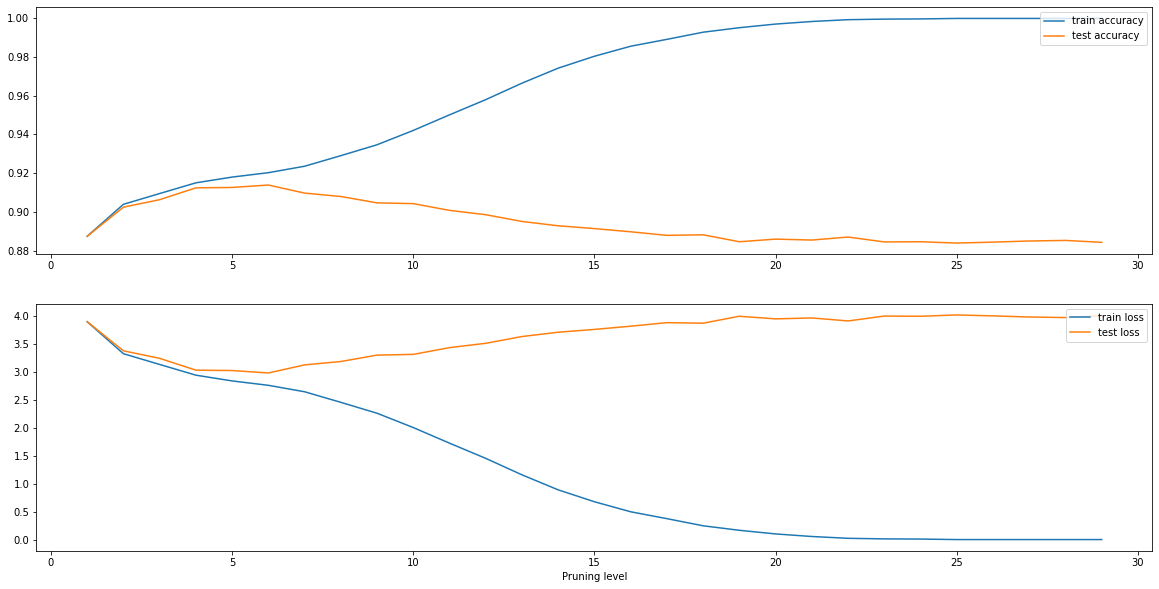

[]

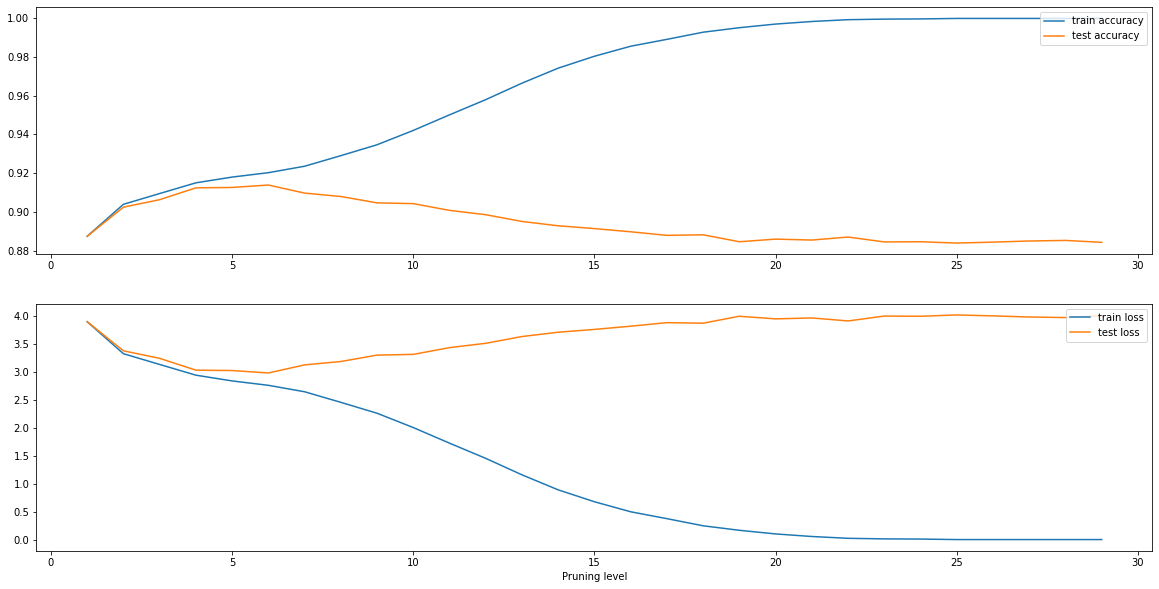

In [ ]:
val_accuracy = []
tra_accuracy = []
val_loss = []
tra_loss = []
depth=list(range(1,30))
for i in depth:

  model1=DecisionTreeClassifier(max_depth=i)
  model1.fit(X_train,y_train)
  predict_train=model1.predict(X_train)
  predict_test=model1.predict(X_test)
  tra_accuracy.append(accuracy_score(y_train, predict_train))
  val_accuracy.append(accuracy_score(y_test, predict_test))
  val_loss.append(log_loss(y_test,predict_test))
  tra_loss.append(log_loss(y_train,predict_train))
  val_f1.append(f1_score(y_test, predict_test))

fig, axs = plt.subplots(2,1, figsize = (20,10))
axs[0].plot(depth, tra_accuracy, label='train accuracy')
axs[0].plot(depth, val_accuracy, label='test accuracy')
axs[0].legend(loc="upper right")
axs[1].plot(depth, tra_loss, label='train loss')
axs[1].plot(depth, val_loss, label='test loss')
axs[1].legend(loc="upper right")
plt.xlabel('Pruning level')
plt.plot()
plt.plot()

In [ ]:
depth[val_loss.index(min(val_loss))]

6

6

Again, in order to find the best max_depth, we use the same method as before and observe that after $max\_depth = 6$, the model tends to overfit.

---

Moreover, we illustrate what happens with Kfold cross validatation, whose principle is illustrated below
![alt_text](https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif) 

From the experience gained above, we create a DecisionTree classifier with max_depth = 6

In [ ]:
kfold_scores = []
folds=list(range(2,30))
for el in folds: 
  kfold =KFold(n_splits=el)
  tree= DecisionTreeClassifier(min_impurity_decrease=0.003,min_samples_leaf=2,max_depth=6)
  results_kfold = cross_val_score(tree, X, y, cv=kfold)
  kk = results_kfold.mean()
  kfold_scores.append(kk)

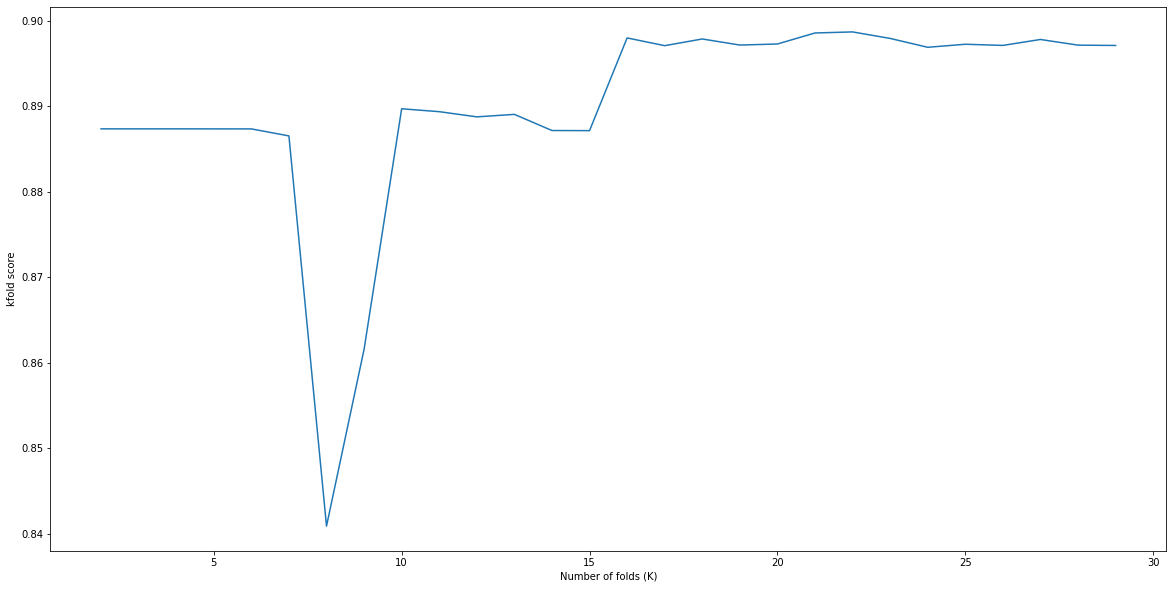

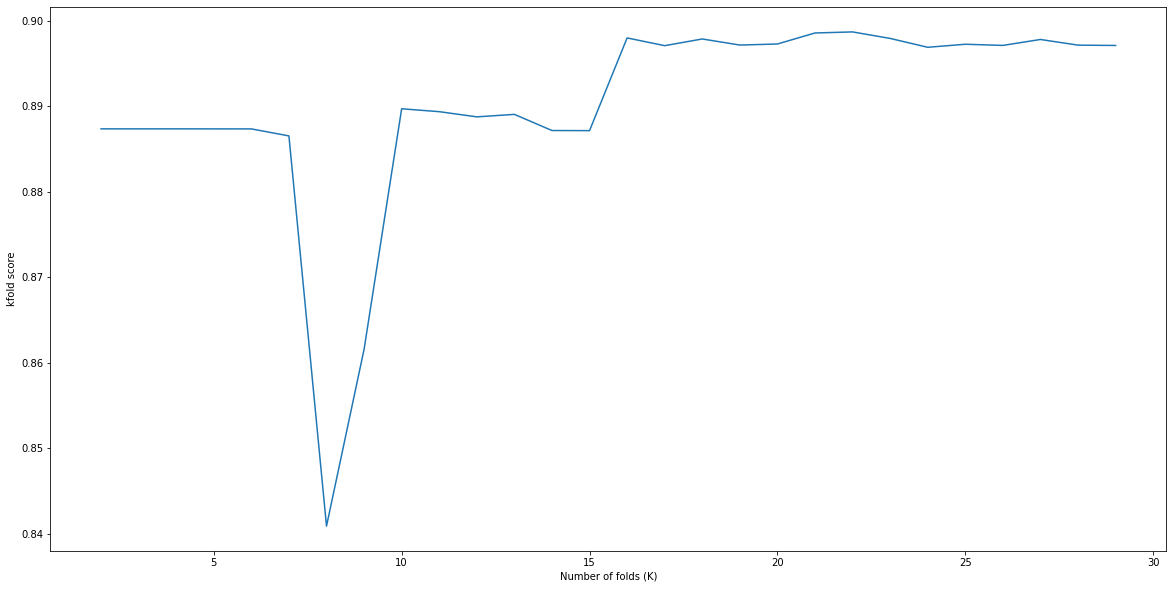

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(folds,kfold_scores)
plt.xlabel('Number of folds (K)')
plt.ylabel('kfold score')
plt.show()

# Third classifier: K-Nearest Neighbors


We go on a local algoritm. We aim to focus on the different behaviour that this model shows. In particular, we study how the number of neighbors considered impact the evaluation made by the model.

[]

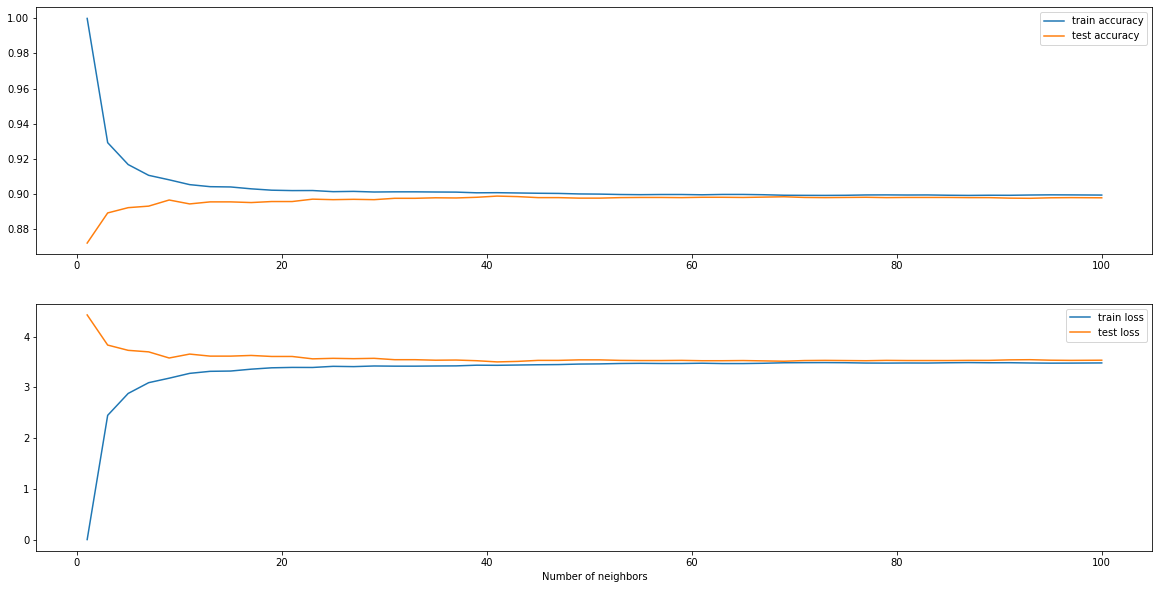

[]

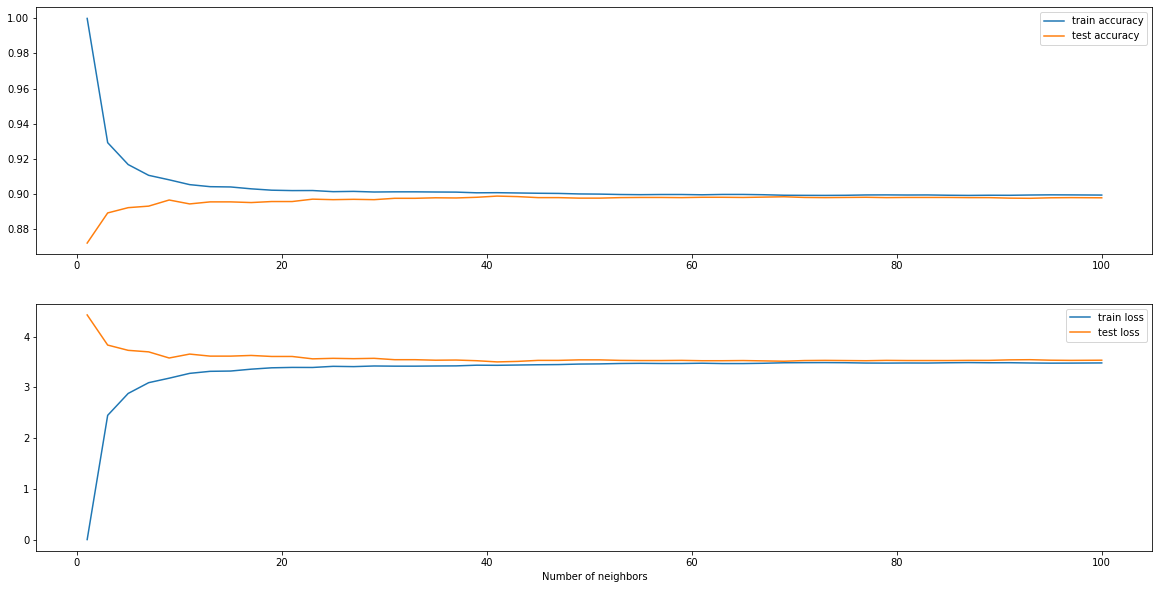

In [ ]:
val_accuracy = []
tra_accuracy = []
val_loss = []
tra_loss = []
neighborss = np.linspace(1,100,dtype=np.int32)
for neighbors in neighborss:

  model2=KNeighborsClassifier(n_neighbors=neighbors)  
  model2.fit(X_train,y_train)
  predict_train = model2.predict(X_train)
  predict_test = model2.predict(X_test)
  tra_accuracy.append(accuracy_score(y_train, predict_train))
  val_accuracy.append(accuracy_score(y_test, predict_test))
  val_loss.append(log_loss(y_test, predict_test))
  tra_loss.append(log_loss(y_train, predict_train))
 
fig, axs = plt.subplots(2,1, figsize = (20,10))
axs[0].plot(neighborss, tra_accuracy, label='train accuracy')
axs[0].plot(neighborss, val_accuracy, label='test accuracy')
axs[0].legend(loc="upper right")
axs[1].plot(neighborss, tra_loss, label='train loss')
axs[1].plot(neighborss, val_loss, label='test loss')
axs[1].legend(loc="upper right")
plt.xlabel('Number of neighbors')
plt.plot()
plt.plot()

As it is possible to see, the k-means is somehow stable, given the features number and the provided observations

### Confusion Matrix

Confusion matrix is used in order to verify how the model performs. It shows where are misclassifications and why.
As it is possible to notice, the KNN algorythm has a large number of both false positives and false negatives (respectively, lower left quadrant and upper right one in confusion matrix).

In [ ]:
confmat=confusion_matrix(y_test,predict_test)
confmat

array([[9057,   80],
       [ 974,  186]])

array([[9057,   80],
       [ 974,  186]])

Text(0.5, 257.44, 'Predicted label')

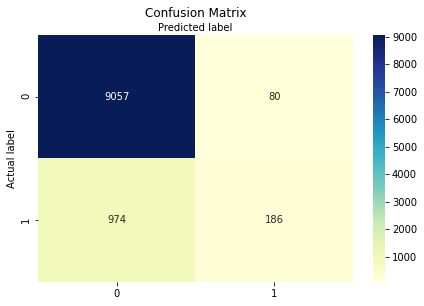

Text(0.5, 257.44, 'Predicted label')

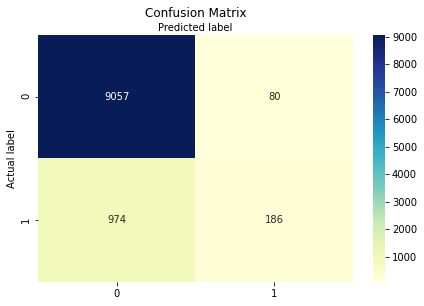

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confmat),annot=True,cmap="YlGnBu",fmt="g")
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
print('''Precision: indica quanto il modello sia accurato\nRecall: è la capacità del classificatore di trovare tutte le y_yes=1\nf1-score: è la media armonica ponderata di precision e ricall\nsupport: è il numero di occorrenze della classe y_yes\n ''')
print(classification_report(y_test, predict_test))

Precision: indica quanto il modello sia accurato
Recall: è la capacità del classificatore di trovare tutte le y_yes=1
f1-score: è la media armonica ponderata di precision e ricall
support: è il numero di occorrenze della classe y_yes
 
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      9137
           1       0.70      0.16      0.26      1160

    accuracy                           0.90     10297
   macro avg       0.80      0.58      0.60     10297
weighted avg       0.88      0.90      0.87     10297

Precision: indica quanto il modello sia accurato
Recall: è la capacità del classificatore di trovare tutte le y_yes=1
f1-score: è la media armonica ponderata di precision e ricall
support: è il numero di occorrenze della classe y_yes
 
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      9137
           1       0.70      0.16      0.26      1160

    accuracy                         

###Model Selection and Validation: Randomized Search CV

In order to perform better prediction and receive prescription about which carachteristics we have to pay more attention to. Moreover, we use XGboost, which is a state of the art algorythm based on boosting.

In [ ]:


one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0.01, 50)

params = { 
    "base_score":st.gamma(0.001,0.8),
    "n_estimators": st.randint(3, 400),
    "max_depth": st.randint(0.1,40),
    "learning_rate": st.uniform(0.0005, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 100),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}



class_mod = XGBClassifier(objective='binary:logistic',feature_selector='random')



gs = RandomizedSearchCV(class_mod, params, n_jobs=1)  
gs.fit(X_train, y_train)  
gs.best_score_

0.9152827397971942

0.9152827397971942

In [ ]:
gs.best_estimator_

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8430834805974274,
              feature_selector='random', gamma=11.043094152158572,
              learning_rate=0.11555102186856582, max_delta_step=0, max_depth=3,
              min_child_weight=60.39207500018671, missing=None, n_estimators=58,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=2.483169643099902, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8263215504639546, verbosity=1)

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8430834805974274,
              feature_selector='random', gamma=11.043094152158572,
              learning_rate=0.11555102186856582, max_delta_step=0, max_depth=3,
              min_child_weight=60.39207500018671, missing=None, n_estimators=58,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=2.483169643099902, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8263215504639546, verbosity=1)

In [ ]:
best = gs.best_estimator_
best.fit(X_train,y_train)
pred1=best.predict(X_test)

In [ ]:
print('''Precision: indica quanto il modello sia accurato\nRecall: è la capacità del classificatore di trovare tutte le y_yes=1\nf1-score: è la media armonica ponderata di precision e ricall\nsupport: è il numero di occorrenze della classe y_yes\n ''')
print(classification_report(y_test, pred1))

Precision: indica quanto il modello sia accurato
Recall: è la capacità del classificatore di trovare tutte le y_yes=1
f1-score: è la media armonica ponderata di precision e ricall
support: è il numero di occorrenze della classe y_yes
 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9137
           1       0.66      0.48      0.55      1160

    accuracy                           0.91     10297
   macro avg       0.80      0.72      0.75     10297
weighted avg       0.90      0.91      0.91     10297

Precision: indica quanto il modello sia accurato
Recall: è la capacità del classificatore di trovare tutte le y_yes=1
f1-score: è la media armonica ponderata di precision e ricall
support: è il numero di occorrenze della classe y_yes
 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9137
           1       0.66      0.48      0.55      1160

    accuracy                         

In [ ]:
best.feature_importances_

array([0.        , 0.        , 0.        , 0.01759964, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02299949,
       0.02092032, 0.11272652, 0.02091312, 0.        , 0.02200458,
       0.04693405, 0.01453708, 0.15311344, 0.01380605, 0.09063418,
       0.        , 0.06455184, 0.03745891, 0.03438772, 0.06529827,
       0.2621148 ], dtype=float32)

array([0.        , 0.        , 0.        , 0.01759964, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02299949,
       0.02092032, 0.11272652, 0.02091312, 0.        , 0.02200458,
       0.04693405, 0.01453708, 0.15311344, 0.01380605, 0.09063418,
       0.        , 0.06455184, 0.03745891, 0.03438772, 0.06529827,
       0.2621148 ], dtype=float32)

In [ ]:
col_names = [X.iloc[:,el].name for el in best.feature_importances_.argsort()]

In [ ]:
feature_importances = pd.DataFrame({"feature_imp":best.feature_importances_,"corresponding_index":best.feature_importances_.argsort(),"column_name":col_names})

In [ ]:
#@title Top10 feature importances
feature_importances.sort_values('feature_imp',ascending=False).head(10)

feature_imp  corresponding_index       column_name
25     0.262115                   25       nr.employed
17     0.153113                   23     cons.conf.idx
11     0.112727                   16       day_of_week
19     0.090634                   15             month
24     0.065298                   17          duration
21     0.064552                   24         euribor3m
15     0.046934                   14         education
22     0.037459                   19             pdays
23     0.034388                   11  poutcome_success
9      0.022999                   13               job

feature_imp  corresponding_index       column_name
25     0.262115                   25       nr.employed
17     0.153113                   23     cons.conf.idx
11     0.112727                   16       day_of_week
19     0.090634                   15             month
24     0.065298                   17          duration
21     0.064552                   24         euribor3m
15     0.046934                   14         education
22     0.037459                   19             pdays
23     0.034388                   11  poutcome_success
9      0.022999                   13               job

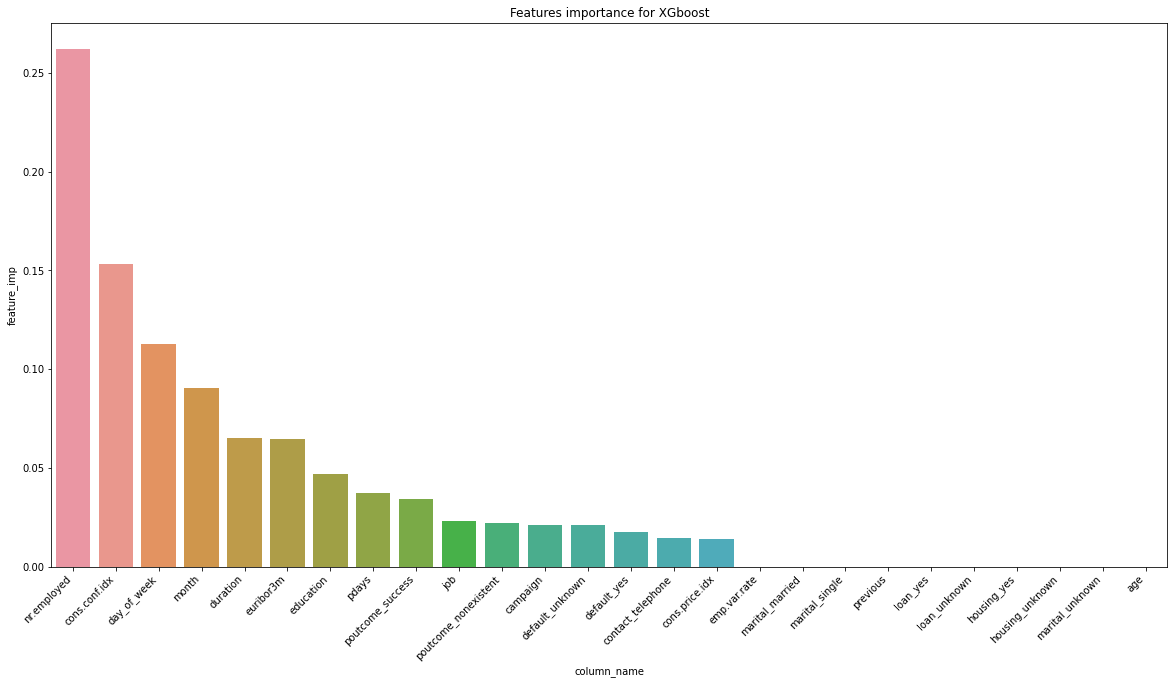

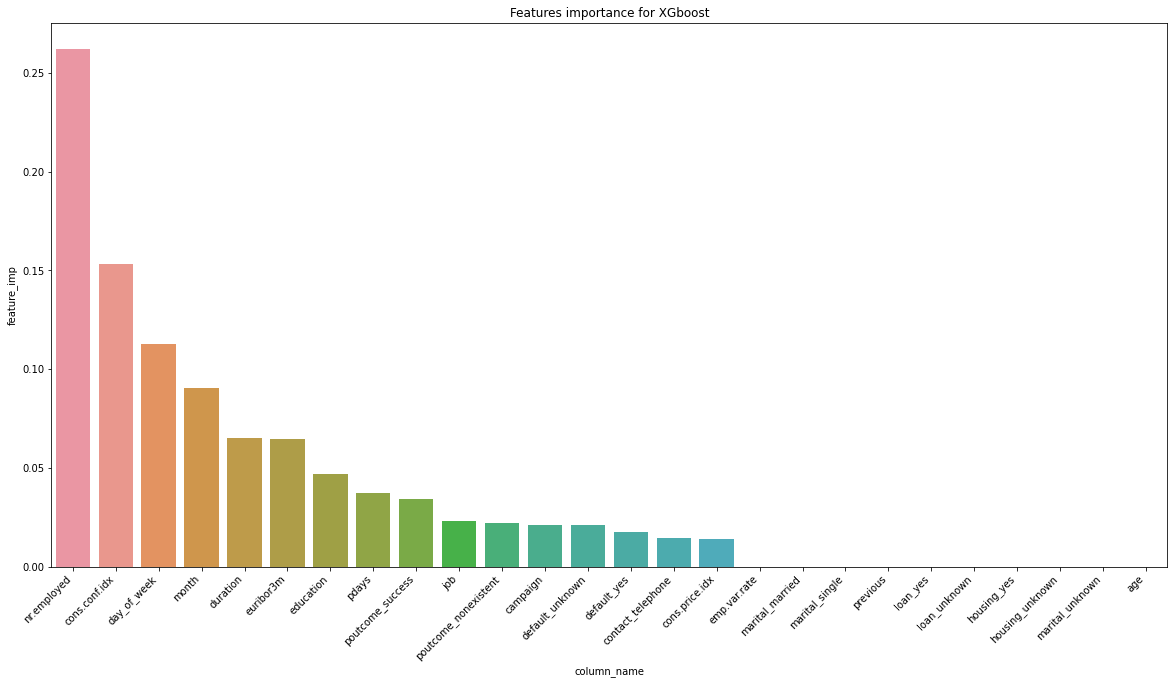

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot('column_name','feature_imp',data = feature_importances.sort_values('feature_imp',ascending=False).loc[:,['feature_imp','column_name']])
plt.xticks(rotation=45,ha='right')
plt.title('Features importance for XGboost')
plt.show()

In [ ]:
print(f1_score(y_test,pred1),recall_score(y_test,pred1),precision_score(y_test,pred1))

0.5546134663341646 0.4793103448275862 0.6579881656804734
0.5546134663341646 0.4793103448275862 0.6579881656804734


In [ ]:
confmat=confusion_matrix(y_test,pred1)
confmat

array([[8848,  289],
       [ 604,  556]])

array([[8848,  289],
       [ 604,  556]])

In [ ]:
xgb_fin = XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9944218597324979,
              feature_selector='random', gamma=3.247699328642639,
              learning_rate=0.14876351661353363, max_delta_step=0, max_depth=5,
              min_child_weight=31.511886818703363, missing=None,
              n_estimators=244, n_jobs=4, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=18.20463548750728, reg_lambda=5, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8488405996301689,
              verbosity=1)

In [ ]:
xgb_fin.fit(X_train,y_train)
pred1=xgb_fin.predict(X_test)

In [ ]:
print('''Precision: indica quanto il modello sia accurato\nRecall: è la capacità del classificatore di trovare tutte le y_yes=1\nf1-score: è la media armonica ponderata di precision e ricall\nsupport: è il numero di occorrenze della classe y_yes\n ''')
print(classification_report(y_test, pred1))

Precision: indica quanto il modello sia accurato
Recall: è la capacità del classificatore di trovare tutte le y_yes=1
f1-score: è la media armonica ponderata di precision e ricall
support: è il numero di occorrenze della classe y_yes
 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9137
           1       0.65      0.52      0.58      1160

    accuracy                           0.91     10297
   macro avg       0.79      0.74      0.77     10297
weighted avg       0.91      0.91      0.91     10297

Precision: indica quanto il modello sia accurato
Recall: è la capacità del classificatore di trovare tutte le y_yes=1
f1-score: è la media armonica ponderata di precision e ricall
support: è il numero di occorrenze della classe y_yes
 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9137
           1       0.65      0.52      0.58      1160

    accuracy                         

In [ ]:
xgb_fin.feature_importances_

array([0.        , 0.0052948 , 0.        , 0.00750123, 0.        ,
       0.        , 0.        , 0.        , 0.01384461, 0.01460256,
       0.01205404, 0.1508424 , 0.00982527, 0.00839414, 0.00922985,
       0.02837434, 0.006294  , 0.13223018, 0.0080717 , 0.03837694,
       0.        , 0.04237919, 0.01340097, 0.01021459, 0.02220415,
       0.46686503], dtype=float32)

array([0.        , 0.0052948 , 0.        , 0.00750123, 0.        ,
       0.        , 0.        , 0.        , 0.01384461, 0.01460256,
       0.01205404, 0.1508424 , 0.00982527, 0.00839414, 0.00922985,
       0.02837434, 0.006294  , 0.13223018, 0.0080717 , 0.03837694,
       0.        , 0.04237919, 0.01340097, 0.01021459, 0.02220415,
       0.46686503], dtype=float32)

In [ ]:
col_names = [X.iloc[:,el].name for el in xgb_fin.feature_importances_.argsort()]

In [ ]:
feature_importances = pd.DataFrame({"feature_imp":best.feature_importances_,"corresponding_index":best.feature_importances_.argsort(),"column_name":col_names})

In [ ]:
#@title Top10 feature importances
feature_importances.sort_values('feature_imp',ascending=False).head(10)

feature_imp  corresponding_index           column_name
25     0.262115                   25           nr.employed
17     0.153113                   23              loan_yes
11     0.112727                   16                   job
19     0.090634                   15             euribor3m
24     0.065298                   17      poutcome_success
21     0.064552                   24                 pdays
15     0.046934                   14  poutcome_nonexistent
22     0.037459                   19          emp.var.rate
23     0.034388                   11              duration
9      0.022999                   13       default_unknown

feature_imp  corresponding_index           column_name
25     0.262115                   25           nr.employed
17     0.153113                   23              loan_yes
11     0.112727                   16                   job
19     0.090634                   15             euribor3m
24     0.065298                   17      poutcome_success
21     0.064552                   24                 pdays
15     0.046934                   14  poutcome_nonexistent
22     0.037459                   19          emp.var.rate
23     0.034388                   11              duration
9      0.022999                   13       default_unknown

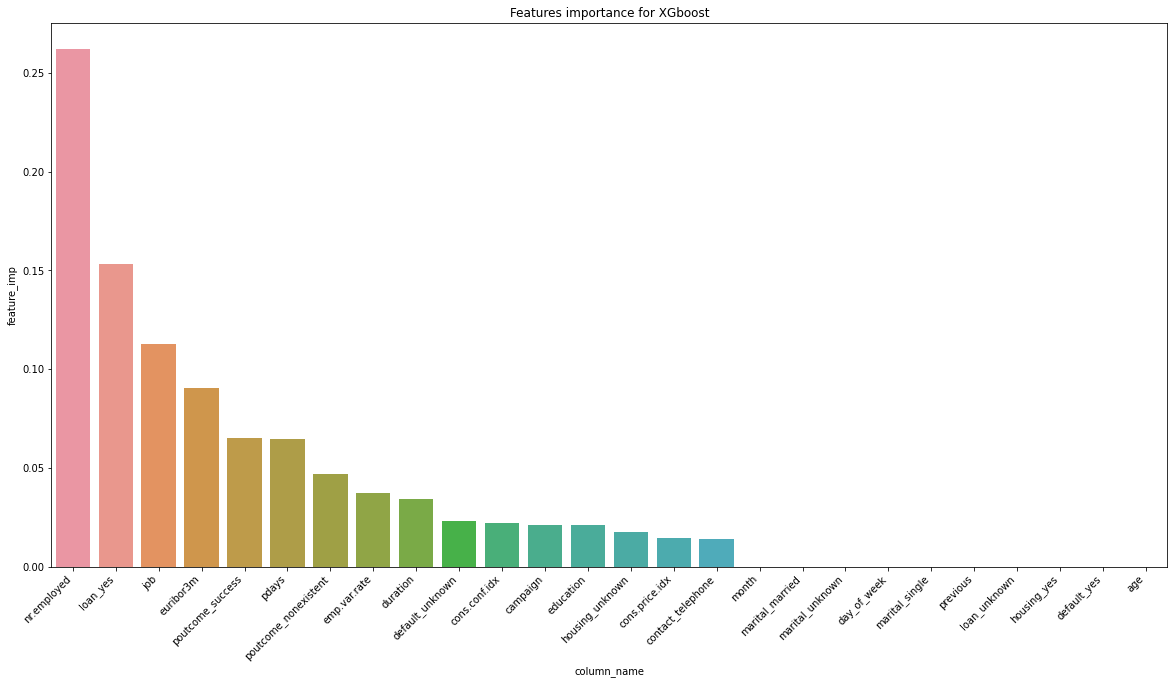

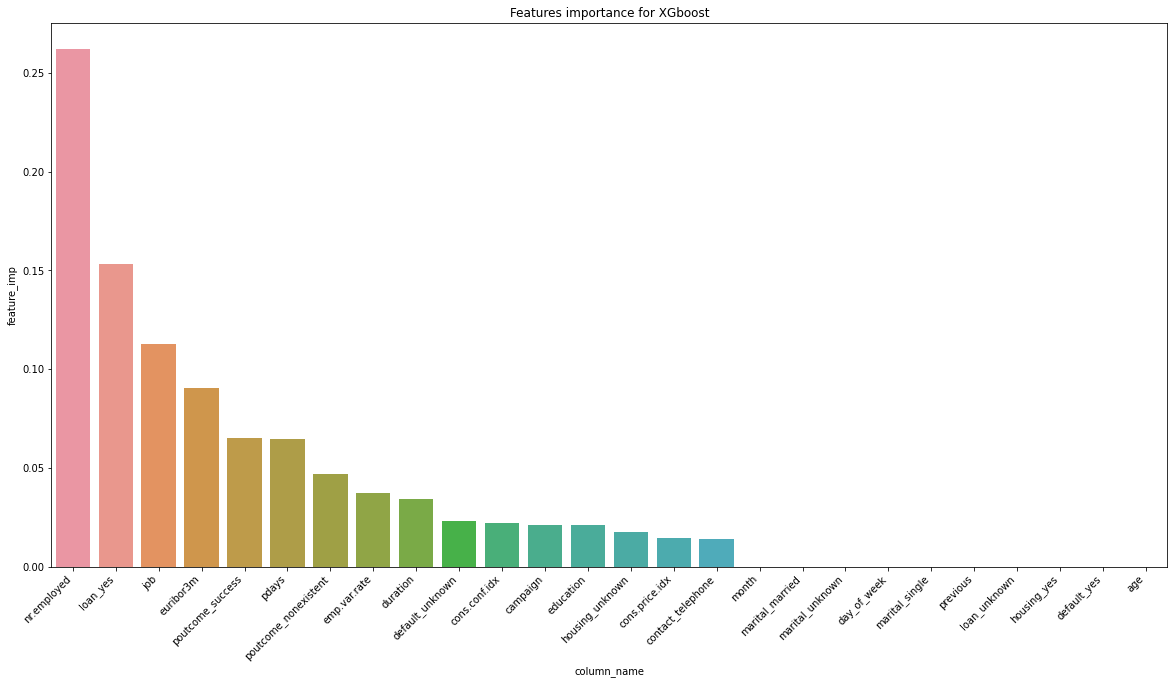

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot('column_name','feature_imp',data = feature_importances.sort_values('feature_imp',ascending=False).loc[:,['feature_imp','column_name']])
plt.xticks(rotation=45,ha='right')
plt.title('Features importance for XGboost')
plt.show()

In [ ]:
print(f1_score(y_test,pred1),recall_score(y_test,pred1),precision_score(y_test,pred1))

0.5783706526917579 0.5232758620689655 0.6464323748668797
0.5783706526917579 0.5232758620689655 0.6464323748668797


In [ ]:
confmat=confusion_matrix(y_test,pred1)
confmat

array([[8805,  332],
       [ 553,  607]])

array([[8805,  332],
       [ 553,  607]])

### Assessing imbalanced learning

Poor recall and precision is clearly a consequence of imbalanced learning. In order to avoid this, we might follow different roads:
* Stratify our train and test sets (already done);
* Proceed in performing random undersampling (with the risk of omitting informative datapoints);
* Performing random oversampling with the risk of overfitting;

In order to perform this task, we go with SMOTE, which is a random oversampling, cost sensitive framework.
As stated above, classes are heavily imbalanced:


In [ ]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=uint8), array([36548,  4640]))

(array([0, 1], dtype=uint8), array([36548,  4640]))

### SMOTE initialization

SMOTE is initialised with the result from agglomerative clustering above. In fact, it showed that, generally speaking, 16 clusters could be retrieved from data. Therefore, we proceed with a smote based on 16 k_neighbors.

In [ ]:
smt = SMOTE(k_neighbors=16)
smtX,smty = smt.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(smty,return_counts=True)

(array([0, 1], dtype=uint8), array([36548, 36548]))

(array([0, 1], dtype=uint8), array([36548, 36548]))

In [ ]:
smtX = pd.DataFrame(smtX,columns=X.columns)

In [ ]:
smtX_train, smtX_test, smty_train, smty_test = train_test_split(smtX,smty,stratify=smty)

In [ ]:
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0.01, 50)

params = { 
    "base_score":st.gamma(0.001,0.8),
    "n_estimators": st.randint(3, 400),
    "max_depth": st.randint(0.1,40),
    "learning_rate": st.uniform(0.0005, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 100),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}



class_mod = XGBClassifier(objective='binary:logistic',feature_selector='random')

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(class_mod, params, n_jobs=1)  
gs.fit(smtX_train, smty_train)  
gs.best_score_

KeyboardInterrupt: ignored

0.9421034973639217

In [ ]:
gs.best_estimator_

XGBClassifier(base_score=0.8000000001894935, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9996776632627872, feature_selector='random',
              gamma=30.010175937936236, learning_rate=0.03267251015755745,
              max_delta_step=0, max_depth=35,
              min_child_weight=67.86602950729475, missing=None,
              n_estimators=304, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=15.222346720834446, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8432186075904238,
              verbosity=1)

In [ ]:
best = gs.best_estimator_
best.fit(smtX_train,smty_train)
pred1=best.predict(smtX_test)

In [ ]:
print('''Precision: indica quanto il modello sia accurato\nRecall: è la capacità del classificatore di trovare tutte le y_yes=1\nf1-score: è la media armonica ponderata di precision e ricall\nsupport: è il numero di occorrenze della classe y_yes\n ''')
print(classification_report(smty_test, pred1))

Precision: indica quanto il modello sia accurato
Recall: è la capacità del classificatore di trovare tutte le y_yes=1
f1-score: è la media armonica ponderata di precision e ricall
support: è il numero di occorrenze della classe y_yes
 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9137
           1       0.94      0.95      0.94      9137

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274



In [ ]:
best.feature_importances_

array([0.        , 0.        , 0.        , 0.0167322 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02739391,
       0.01773042, 0.01596648, 0.0134629 , 0.01398954, 0.02889494,
       0.06857169, 0.03161771, 0.2243212 , 0.03155033, 0.02968013,
       0.00848826, 0.03366447, 0.03802422, 0.03485643, 0.04306278,
       0.32199234], dtype=float32)

In [ ]:
col_names = [X.iloc[:,el].name for el in best.feature_importances_.argsort()]

In [ ]:
feature_importances = pd.DataFrame({"feature_imp":best.feature_importances_,"corresponding_index":best.feature_importances_.argsort(),"column_name":col_names})

In [ ]:
#@title Top10 feature importances
feature_importances.sort_values('feature_imp',ascending=False).head(10)

feature_imp  corresponding_index     column_name
25     0.321992                   25     nr.employed
17     0.224321                   18        campaign
15     0.068572                   14       education
24     0.043063                   17        duration
22     0.038024                   24       euribor3m
23     0.034856                   15           month
21     0.033664                   22  cons.price.idx
16     0.031618                   19           pdays
18     0.031550                   16     day_of_week
19     0.029680                   21    emp.var.rate

In [ ]:
print(f1_score(smty_test,pred1),recall_score(smty_test,pred1),precision_score(smty_test,pred1))

0.9426211693110194 0.9493269125533544 0.9360094960612928


In [ ]:
confmat=confusion_matrix(smty_test,pred1)
confmat

array([[8544,  593],
       [ 463, 8674]])

In [ ]:
pred_or = best.predict(X_test)
print(f1_score(y_test,pred_or),recall_score(y_test,pred_or),precision_score(y_test,pred_or))

0.6456571867794003 0.7241379310344828 0.5825242718446602


In [ ]:
confmat = confusion_matrix(y_test,pred_or)
confmat

array([[8535,  602],
       [ 320,  840]])

In [ ]:
data_ext_full['nr.employed'].max()

5228.1

#Conclusions

## Tech stuff

### Algorithms

Data was heavily imbalanced. As a result we have tried different algos with no one truly outperforming the others. The evidence shows, however, that XGBoost held an edge over the other algorithms, thanks to the Randomized Search Cross Validation approach. The second best performing algorythm has been the Decision Tree, since it is a non parametric model and so, fully adapted to our data, at expense of a overfitting risk.

### Imbalancement learning

Thanks to the SMOTE, which has been initialized with the results of the Agglomerative Clustering, we have rebalanced the classes with the minority class ones. We could observe a general improvement of both precision and recall on original test set.

## Business Conclusions and Research Question

Our analysis suggest that the bank marketing campaign heavily relies on employees, the job of the subject, the consumer price index and the marital status affect the choice, client side, on wether subscribing or not the term deposit. 

Investing in telephone marketing implies increasing the amount of employees that a company has to hire. Consequently, it is not scalable.

## Final remarks

The analisis provided is a first attempt to show how real data can be treated with different machine learning algoritms. Moreover, we have taken the freedom to learn and study, in an indipendent fashion, new algoritms not treated in this course. 

In conclusion, we are now conscious about the new acquired competences, to be used in the real world challanges.

Plans for the future......... (see below)

In [ ]:
#@title Maybe PCA? Not only... (open to check)
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD
import tensorflow as tf